# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The purpose of this project is to analyze the reasoning behind California's low participation rate in the ACT test for 2017 and 2018 and recommend practical solutions for how the College Board is able to increase participation rate amongst graduating seniors in California.  Comparisons will also be made against national averages and states such as Alabama and Kentucky where the ACT exam is mandatory and fully-funded for all graduating seniors.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1340]:
#Imports:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [1341]:
#Code:
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [1342]:
#Code:
sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [1343]:
act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [1344]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [1345]:
act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [1346]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [1347]:
sat_17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

1. Both sat_17 and act_17 have similar data relating to state and participation rates. However,the subjects for the individual test are different. SATs have two tests - Evidence-based  Reading and Writing & Math while ACTs have four tests - English, Math, Reading & Science. The way the total scores are calculated are also different - SATs calculated the combined score of both tests while ACTs calculate the composite score(average score) of the four tests.


2. For the sat_17 data set, there are 51 rows and 5 columns. For the act_17 data set, there are 52 rows and 7 columns.


3. For the sat_17 data set, the State and Participation columns are objects while Evidence-Based Reading and Writing, Math and Total columns are integers. For the act_17 data set, the State, Participation and Composite columns are objects while English, Math, Reading and Science are floats.


4. For the sat_17 data set, the minimum-maximum values for Evidence-Based Reading and Writing and Math are 482-644 and 52-651 respectively. For the act_17 data set, the minimum-maximum values for English, Math, Reading and Science are 16.3-25.5, 18-25.3, 18-26 and 2.3-24.9 respectively.


#### 4a. Does the data look complete? 

In [1348]:
sat_17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [1349]:
act_17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer: Yes the data looks complete as there are 50 states included in both sat_17 and act_17 data sets. There are no null values noted in the dataset. act_17 data set has an additional row for national average.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
The minimum and maximum possible value for the SAT is 400 and 1600 respectively. Each subtest has a minimum and maximum possible value of 200 and 800 respectively.
For the SAT data, the Participation rate is presented as a string with special characters instead of an integer.
Also, the Maryland average Math score for SAT 2017 should be 524 instead of 52.

The minimum and maximum possible value for the ACT is 1 and 36 respectively. Each subtest has a minimum and maximum possible value of 1 and 36 respectively.
For the ACT data, the Composite score column is presented as a string instead of a float, and the Participation rate is presented with special characters as a string instead of an integer. There also appears to be an additional 'x' included in the Composite score column for Wyoming State. There is also an extra row for national data which should be excluded if comparing between states.
Also, the Maryland average Science score for ACT 2017 should be 23.2 instead of 2.3

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [1350]:
#Removed special characters from Participation column and convert to integer
sat_17['Participation'] = sat_17['Participation'].str.replace('%','')
sat_17['Participation'] = sat_17['Participation'].astype(int)
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [1351]:
#Amended Maryland Math score for SAT 2017
sat_17.loc['Maryland','Math'] = 524

In [1352]:
#Removed special character from Composite column and convert to float
act_17['Composite'] = act_17['Composite'].apply(lambda y: y.replace('x','')).astype(float)
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [1353]:
#Remove National row and reset index to start from 0
act_17 = act_17[act_17['State']!='National']
act_17 = act_17.reset_index(drop=True)

In [1354]:
#Amended Maryland Science score for ACT 2017
act_17['Science'] = act_17['Science'].replace(2.3,23.2)

#### 5. What are your data types? 
Display the data types of each feature. 

In [1355]:
#code
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to Maryland
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  52 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [1356]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Amended Participation column for sat_17 from str to integer.
Amended Participation column for act_17 from str to integer and Composite column from str to float.
Refer to 4c above.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [1357]:
act_17['Participation'].dtypes

dtype('O')

In [1358]:
def convert(col):
    return int(col.replace('%',''))

In [1359]:
#Removed special characters from Participation column and convert to integer
act_17['Participation'] = act_17['Participation'].apply(convert)

- Fix any individual values preventing other columns from being the appropriate type.

In [1360]:
#code
#Refer to 4c above for errors fixed

- Finish your data modifications by making sure the columns are now typed appropriately.

In [1361]:
#code
#Refer to 4c above for errors fixed

- Display the data types again to confirm they are correct.

In [1362]:
#Code:
sat_17['Participation'].dtype

dtype('float64')

In [1363]:
act_17['Participation'].dtype

dtype('int64')

In [1364]:
act_17['Composite'].dtype

dtype('float64')

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [1365]:
sat_17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [1366]:
#renamed SAT columns to unique names
sat_17_renamed = [col.lower() + '_sat_17' for col in sat_17.columns]
sat_17.columns = sat_17_renamed
sat_17.rename(columns = {'state_sat_17':'state','evidence-based reading and writing_sat_17':'reading_and_writing_sat_17'}, inplace=True) 

In [1367]:
sat_17.head()

,state,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [1368]:
act_17.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [1369]:
#renamed ACT columns to unique names
act_17_renamed = [col.lower() + '_act_17' for col in act_17.columns]
act_17.columns = act_17_renamed
act_17.rename(columns = {'state_act_17':'state'}, inplace=True) 
act_17.head()

,state,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
0,Alabama,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4
4,California,31,22.5,22.7,23.1,22.2,22.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2017/2018 ACT/SAT|The individual state out of the 50 states in the United States of America.| 
|**participation_sat**|*int*|2017/2018 SAT|The participation rate of the SAT, defined as the percentage of a state's high school seniors taking the SAT.| 
|**reading_and_writing_sat**|*int*|2017/2018 SAT|The average SAT scores for the Evidence-Based Reading and Writing (EBRW) section, scaled between 200 and 800 points.|
|**math_sat**|*int*|2017/2018 SAT|The average SAT scores for the Math section, scaled between 200 and 800 points.|
|**total_sat**|*int*|2017/2018 SAT|The average total of SAT scores for both the Evidence-Based Reading and Writing (EBRW) section and Math section, scaled out of 1,600 points.|
|**participation_act**|*int*|2017/2018 ACT|The participation rate of the ACT, defined as the percentage of a state's high school seniors taking the ACT represented by the z-score mean of a truncated normal distribution.|
|**english_act**|*float*|2017/2018 ACT|The average ACT scores for the English section, scored on a scale of 1 - 36.|
|**math_act**|*float*|2017/2018 ACT|The average ACT scores for the Math section, scored on a scale of 1 - 36.|
|**reading_act**|*float*|2017/2018 ACT|The average ACT scores for the Reading section, scored on a scale of 1 - 36.|
|**science_act**|*float*|2017/2018 ACT|The average ACT scores for the Science section, scored on a scale of 1 - 36.|
|**composite_act**|*float*|2017/2018 ACT|The average ACT composite score, calculated as the average of the scores for the four sections.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [1370]:
#removed National row for act_17. Refer to 4c above.

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [1371]:
#Code:
merged_scores_17 = sat_17.join(act_17.set_index('state'), on='state', how='inner')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [1372]:
#code
merged_scores_17.to_csv('combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [1373]:
#Read in ACT and SAT 2018 data
sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018_updated.csv')

In [1374]:
#Check datatype for SAT 2018 columns
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


There are no missing values in sat_18 dataset.

In [1375]:
#Removed special characters from Participation column and convert to integer
sat_18['Participation'] = sat_18['Participation'].apply(convert)

In [1376]:
#renamed SAT columns to unique names
sat_18_renamed = [col.lower() + '_sat_18' for col in sat_18.columns]
sat_18.columns = sat_18_renamed
sat_18.rename(columns = {'state_sat_18':'state','evidence-based reading and writing_sat_18':'reading_and_writing_sat_18'}, inplace=True)
sat_18.head()

,state,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [1377]:
#Check datatype for ACT 2018 columns
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [1378]:
#renamed ACT columns to unique names
act_18 = act_18.rename(columns = {'State':'state','Percentage of Students Tested':'participation_act_18','Average Composite Score':'composite_act_18','Average English Score':'english_act_18','Average Math Score':'math_act_18','Average Reading Score':'reading_act_18','Average Science Score':'science_act_18'})
act_18.head()

,state,participation_act_18,composite_act_18,english_act_18,math_act_18,reading_act_18,science_act_18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [1379]:
#reorder composite_act_18 column to the last column
act_18 = act_18[['state', 'participation_act_18', 'english_act_18', 'math_act_18', 'reading_act_18', 'science_act_18', 'composite_act_18']]
act_18.head()

,state,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [1380]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                         51 non-null object
participation_sat_18          51 non-null int64
reading_and_writing_sat_18    51 non-null int64
math_sat_18                   51 non-null int64
total_sat_18                  51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [1381]:
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                   51 non-null object
participation_act_18    51 non-null int64
english_act_18          51 non-null float64
math_act_18             51 non-null float64
reading_act_18          51 non-null float64
science_act_18          51 non-null float64
composite_act_18        51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [1382]:
#merge dataframes for SAT 2018 and ACT 2018
merged_scores_18 = sat_18.join(act_18.set_index('state'), on='state', how='outer')

In [1383]:
#merge dataframes for SAT 2017, ACT 2017 and SAT 2018, ACT 2018
merged_scores = merged_scores_17.join(merged_scores_18.set_index('state'), on='state', how='left')

In [1384]:
#save merged dataframe
merged_scores.to_csv('final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [1385]:
#Code:
round(merged_scores.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
participation_sat_17,51.0,39.80,35.28,2.0,4.00,38.0,66.00,100.0
reading_and_writing_sat_17,51.0,569.12,45.67,482.0,533.50,559.0,613.00,644.0
math_sat_17,51.0,547.63,84.91,52.0,522.00,548.0,599.00,651.0
total_sat_17,51.0,1126.10,92.49,950.0,1055.50,1107.0,1212.00,1295.0
participation_act_17,51.0,65.25,32.14,8.0,31.00,69.0,100.00,100.0
english_act_17,51.0,20.93,2.35,16.3,19.00,20.7,23.30,25.5
math_act_17,51.0,21.18,1.98,18.0,19.40,20.9,23.10,25.3
reading_act_17,51.0,22.01,2.07,18.1,20.45,21.8,24.15,26.0
science_act_17,51.0,21.45,1.74,18.2,19.95,21.3,23.20,24.9
composite_act_17,51.0,21.52,2.02,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [1386]:
#code
def mean(data):
    return float(sum(data) / len(data))

def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])

def stddev(data):
    return round(np.sqrt(variance(data)),2)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [1387]:
sd = {col.name:stddev(col) for col in [merged_scores[i] for i in merged_scores.columns if (merged_scores[i].dtype=='float64') or (merged_scores[i].dtype=='int64')]}
sd

{'participation_sat_17': 34.93,
 'reading_and_writing_sat_17': 45.22,
 'math_sat_17': 84.07,
 'total_sat_17': 91.58,
 'participation_act_17': 31.82,
 'english_act_17': 2.33,
 'math_act_17': 1.96,
 'reading_act_17': 2.05,
 'science_act_17': 1.72,
 'composite_act_17': 2.0,
 'participation_sat_18': 36.95,
 'reading_and_writing_sat_18': 47.03,
 'math_sat_18': 47.3,
 'total_sat_18': 93.23,
 'participation_act_18': 33.75,
 'english_act_18': 2.42,
 'math_act_18': 2.02,
 'reading_act_18': 2.15,
 'science_act_18': 1.85,
 'composite_act_18': 2.09}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No. Output from pandas .describe function assumes 1 degree of freedom by default, also known as sample standard deviation. numpy.std assumes 0 degree of freedom by default, also known as population standard deviation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [1388]:
sat_17.sort_values('participation_sat_17', ascending = False) [['state','participation_sat_17']].head()

,state,participation_sat_17
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


District of Columbia, Michigan, Connecticut and Delaware have the highest participation rates for the 2017 SAT.

In [1389]:
sat_17.sort_values('participation_sat_17') [['state','participation_sat_17']].head(4)

,state,participation_sat_17
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0


North Dakota, Mississippi and Iowa have the lowest participation rates for the 2017 SAT.

In [1390]:
sat_18.sort_values('participation_sat_18', ascending = False) [['state','participation_sat_18']].head(6)

,state,participation_sat_18
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100
19,Maine,99


Colorado, Connecticut, Delaware, Michigan and Idaho have the highest participation rates for the 2018 SAT.

In [1391]:
sat_18.sort_values('participation_sat_18') [['state','participation_sat_18']].head(2)

,state,participation_sat_18
34,North Dakota,2
50,Wyoming,3


North Dakota has the lowest participation rates for the 2018 SAT.

In [1392]:
act_17.sort_values('participation_act_17', ascending = False) [['state','participation_act_17']].head(18)

,state,participation_act_17
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
33,North Carolina,100
28,Nevada,100
26,Montana,100


Alabama, Kentucy, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas have the highest participation rates for the 2017 ACT.

In [1393]:
act_17.sort_values('participation_act_17') [['state','participation_act_17']].head(2)

,state,participation_act_17
19,Maine,8
29,New Hampshire,18


Maine has the lowest participation rates for the 2017 ACT.

In [1394]:
act_18.sort_values('participation_act_18', ascending = False) [['state','participation_act_18']].head(18)

,state,participation_act_18
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


Alabama, Kentucy, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming and Arkansas have the highest participation rates for the 2018 ACT.

In [1395]:
act_18.sort_values('participation_act_18') [['state','participation_act_18']].head(2)

,state,participation_act_18
19,Maine,7
39,Rhode Island,15


Maine has the lowest participation rates for the 2018 ACT.

In [1396]:
sat_17.sort_values('total_sat_17', ascending = False) [['state','total_sat_17']].head(2)

,state,total_sat_17
23,Minnesota,1295.0
49,Wisconsin,1291.0


Minnesota has the highest mean total score for the 2017 SAT.

In [1397]:
sat_17.sort_values('total_sat_17') [['state','total_sat_17']].head(2)

,state,total_sat_17
8,District of Columbia,950.0
7,Delaware,996.0


District of Columbia has the lowest mean total score for the 2017 SAT.

In [1398]:
sat_18.sort_values('total_sat_18', ascending = False) [['state','total_sat_18']].head(2)

,state,total_sat_18
23,Minnesota,1298
49,Wisconsin,1294


Minnesota has the highest mean total score for the 2018 SAT.

In [1399]:
sat_18.sort_values('total_sat_18') [['state','total_sat_18']].head(2)

,state,total_sat_18
8,District of Columbia,977
7,Delaware,998


District of Columbia has the lowest mean total score for the 2018 SAT.

In [1400]:
act_17.sort_values('composite_act_17', ascending = False) [['state','composite_act_17']].head(2)

,state,composite_act_17
29,New Hampshire,25.5
21,Massachusetts,25.4


New Hampshire has the highest mean composite score for the 2017 ACT.

In [1401]:
act_17.sort_values('composite_act_17') [['state','composite_act_17']].head(2)

,state,composite_act_17
28,Nevada,17.8
24,Mississippi,18.6


Nevada has the lowest mean composite score for the 2017 ACT.

In [1402]:
act_18.sort_values('composite_act_18', ascending = False) [['state','composite_act_18']].head(2)

,state,composite_act_18
6,Connecticut,25.6
21,Massachusetts,25.5


Connecticut has the highest mean composite score for the 2018 ACT.

In [1403]:
act_18.sort_values('composite_act_18') [['state','composite_act_18']].head(2)

,state,composite_act_18
28,Nevada,17.7
40,South Carolina,18.3


Nevada has the lowest mean composite score for the 2018 ACT.

In [1404]:
merged_scores.sort_values('participation_sat_17', ascending = False) [['participation_sat_17','participation_sat_18']].head()

,participation_sat_17,participation_sat_18
8,100.0,92
22,100.0,100
6,100.0,100
7,100.0,100
29,96.0,96


District of Columbia with 100% participation on SAT in 2017 had a rate change year-to-year to 92% in 2018.

In [1405]:
merged_scores.sort_values('participation_act_17', ascending = False) [['participation_act_17','participation_act_18']].head(18)

,participation_act_17,participation_act_18
0,100,100
17,100,100
49,100,100
44,100,100
42,100,100
40,100,100
36,100,100
33,100,100
28,100,100
26,100,100


Minnesota with 100% participation on ACT in 2017 had a rate change year-to-year to 99% in 2018.

In [1406]:
merged_scores[(merged_scores['participation_sat_17']>50) & (merged_scores['participation_act_17']>50)][['state','participation_sat_17','participation_act_17']]

,state,participation_sat_17,participation_act_17
9,Florida,83.0,73
10,Georgia,61.0,55
11,Hawaii,55.0,90


Florida, Georgia, Hawaii and South Carolina have >50% participation on both tests in 2017.

In [1407]:
merged_scores[(merged_scores['participation_sat_18']>50) & (merged_scores['participation_act_18']>50)][['state','participation_sat_18','participation_act_18']]

,state,participation_sat_18,participation_act_18
9,Florida,56,66
10,Georgia,70,53
11,Hawaii,56,89
33,North Carolina,52,100
40,South Carolina,55,100


Florida, Georgia, Hawaii, North Carolina and South Carolina have >50% participation on both tests in 2018.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

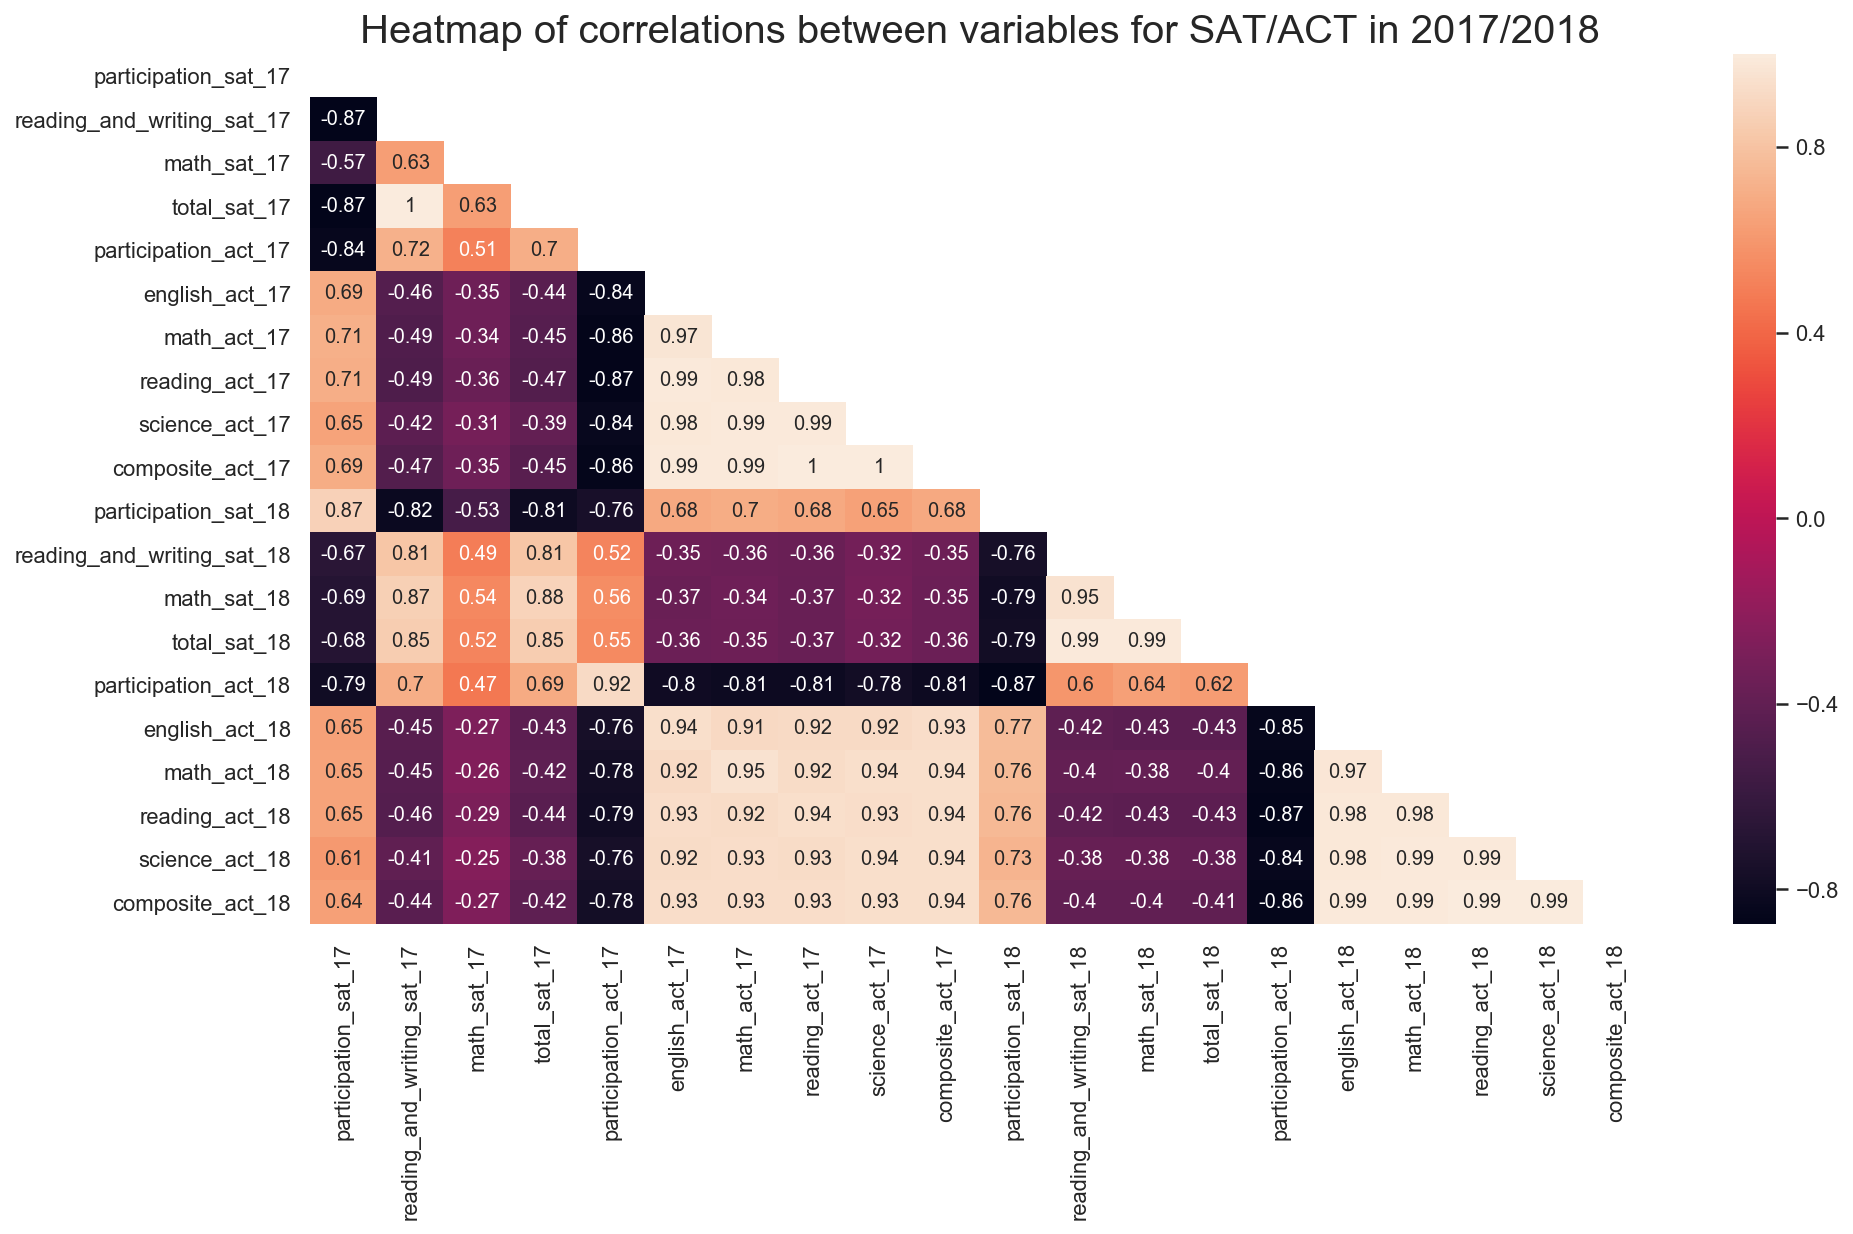

In [1408]:
# Make a heatmap on the correlations between variables in the housing data:
fig, ax = plt.subplots(figsize=(15,8))
merged_scores_correlations = merged_scores.corr();
# Compute the correlation matrix
corr = merged_scores.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(merged_scores_correlations, mask=mask, annot=True);
plt.title('Heatmap of correlations between variables for SAT/ACT in 2017/2018', fontsize=20);

1. Students that do well in one particular Section, tend to do well in the other Sections in the same test, as evidenced from the strong positive correlation coefficients. This applies to both SAT and ACT.
2. There is a strong negative correlation between section/ test scores compared to participation rates. This applies to both SAT and ACT.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [1409]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16, 9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].title.set_text(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].vlines(x=np.mean(dataframe[column]),
           ymin = 0,
           ymax = 25,
           color='r',
           linestyle = '--',
           label = 'mean'
        );
        ax[i].vlines(x=np.median(dataframe[column]),
           ymin = 0,
           ymax = 25,
           color='k',
           linestyle = '--',
            label = 'median');
        ax[i].legend() 
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

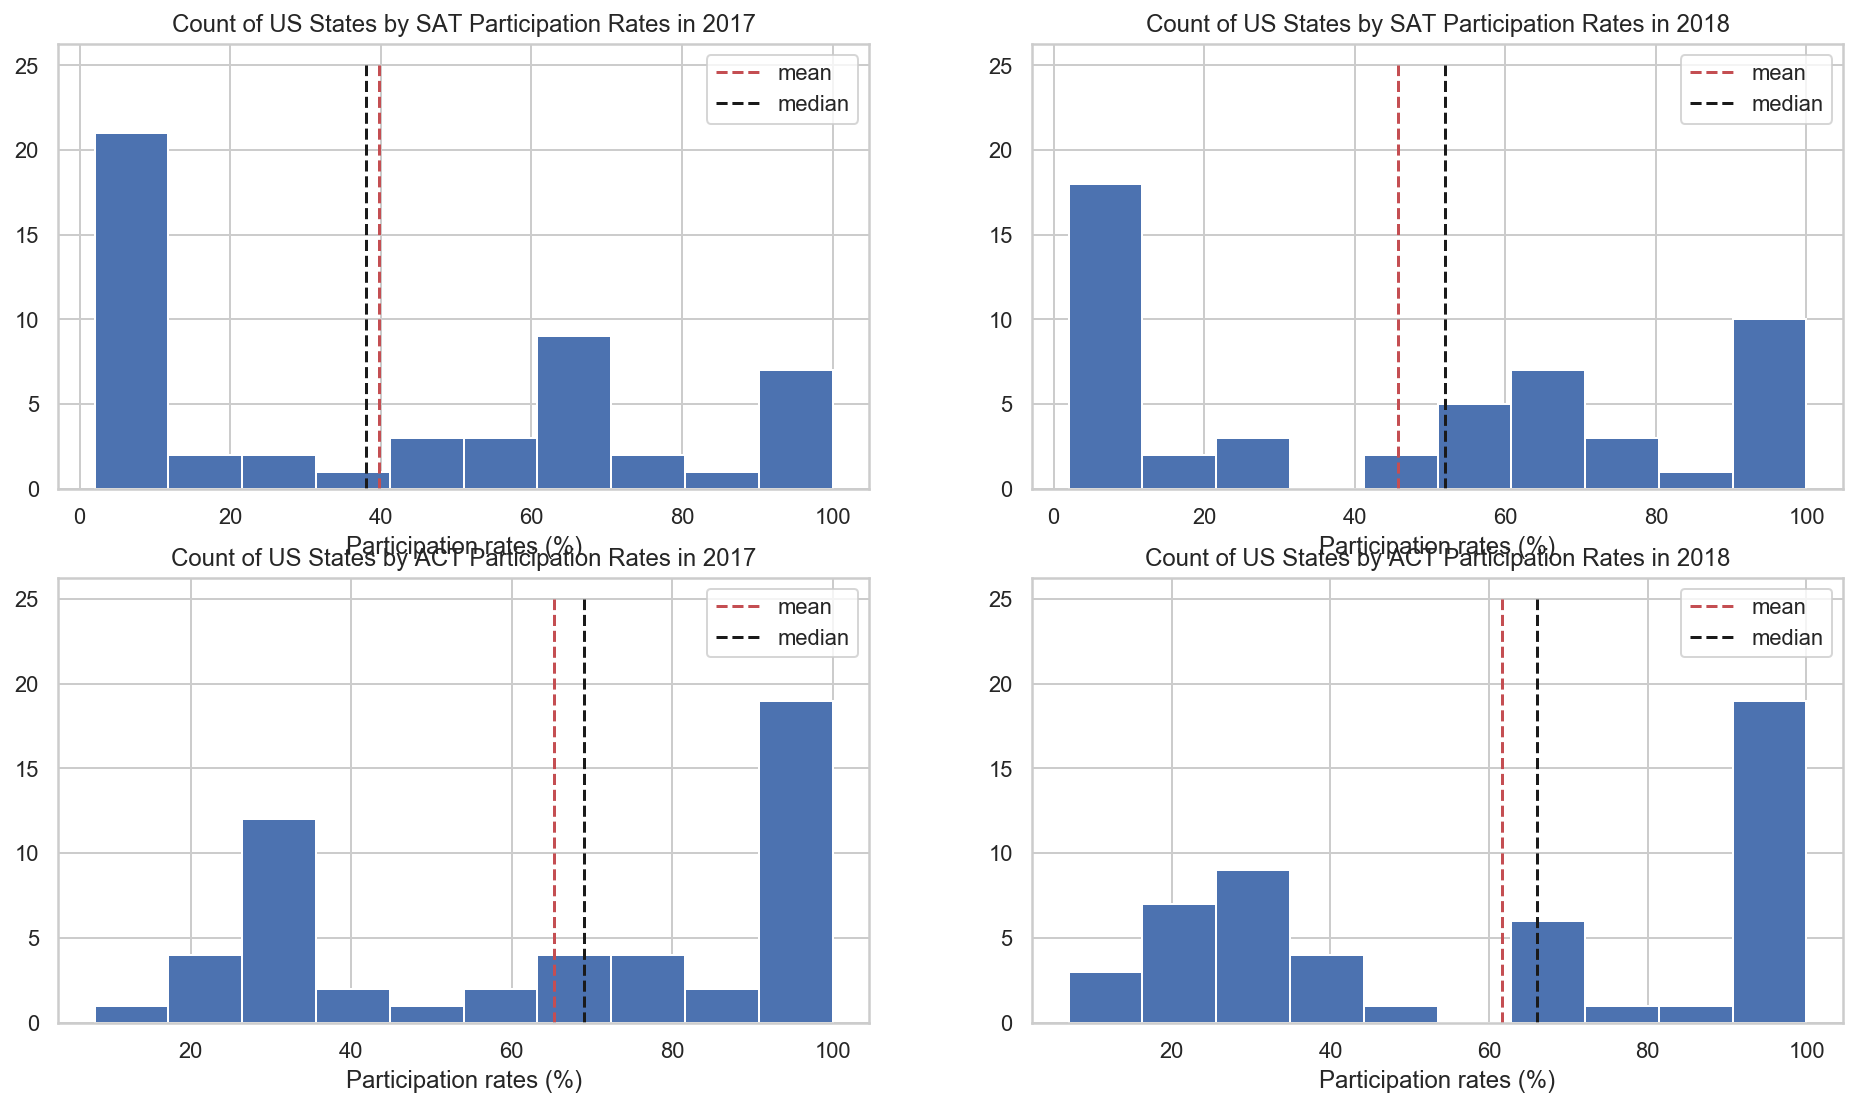

In [1410]:
#Participation rates for SAT & ACT
subplot_histograms(merged_scores,['participation_sat_17','participation_sat_18','participation_act_17','participation_act_18'],\
['Count of US States by SAT Participation Rates in 2017','Count of US States by SAT Participation Rates in 2018','Count of US States by ACT Participation Rates in 2017','Count of US States by ACT Participation Rates in 2018'],['Participation rates (%)','Participation rates (%)','Participation rates (%)','Participation rates (%)'])


1. There is a significant number of US States that has a participation rate of 0% to 10% in SAT for both 2017 and 2018. (21 in 2017 vs 18 in 2018) The distribution skews to the right.
2. There is a significant number of US States that has a participation rate of 90% to 100% in ACT for both 2017 and 2018. (20 in 2017 vs 20 in 2018) The distribution skews to the left.

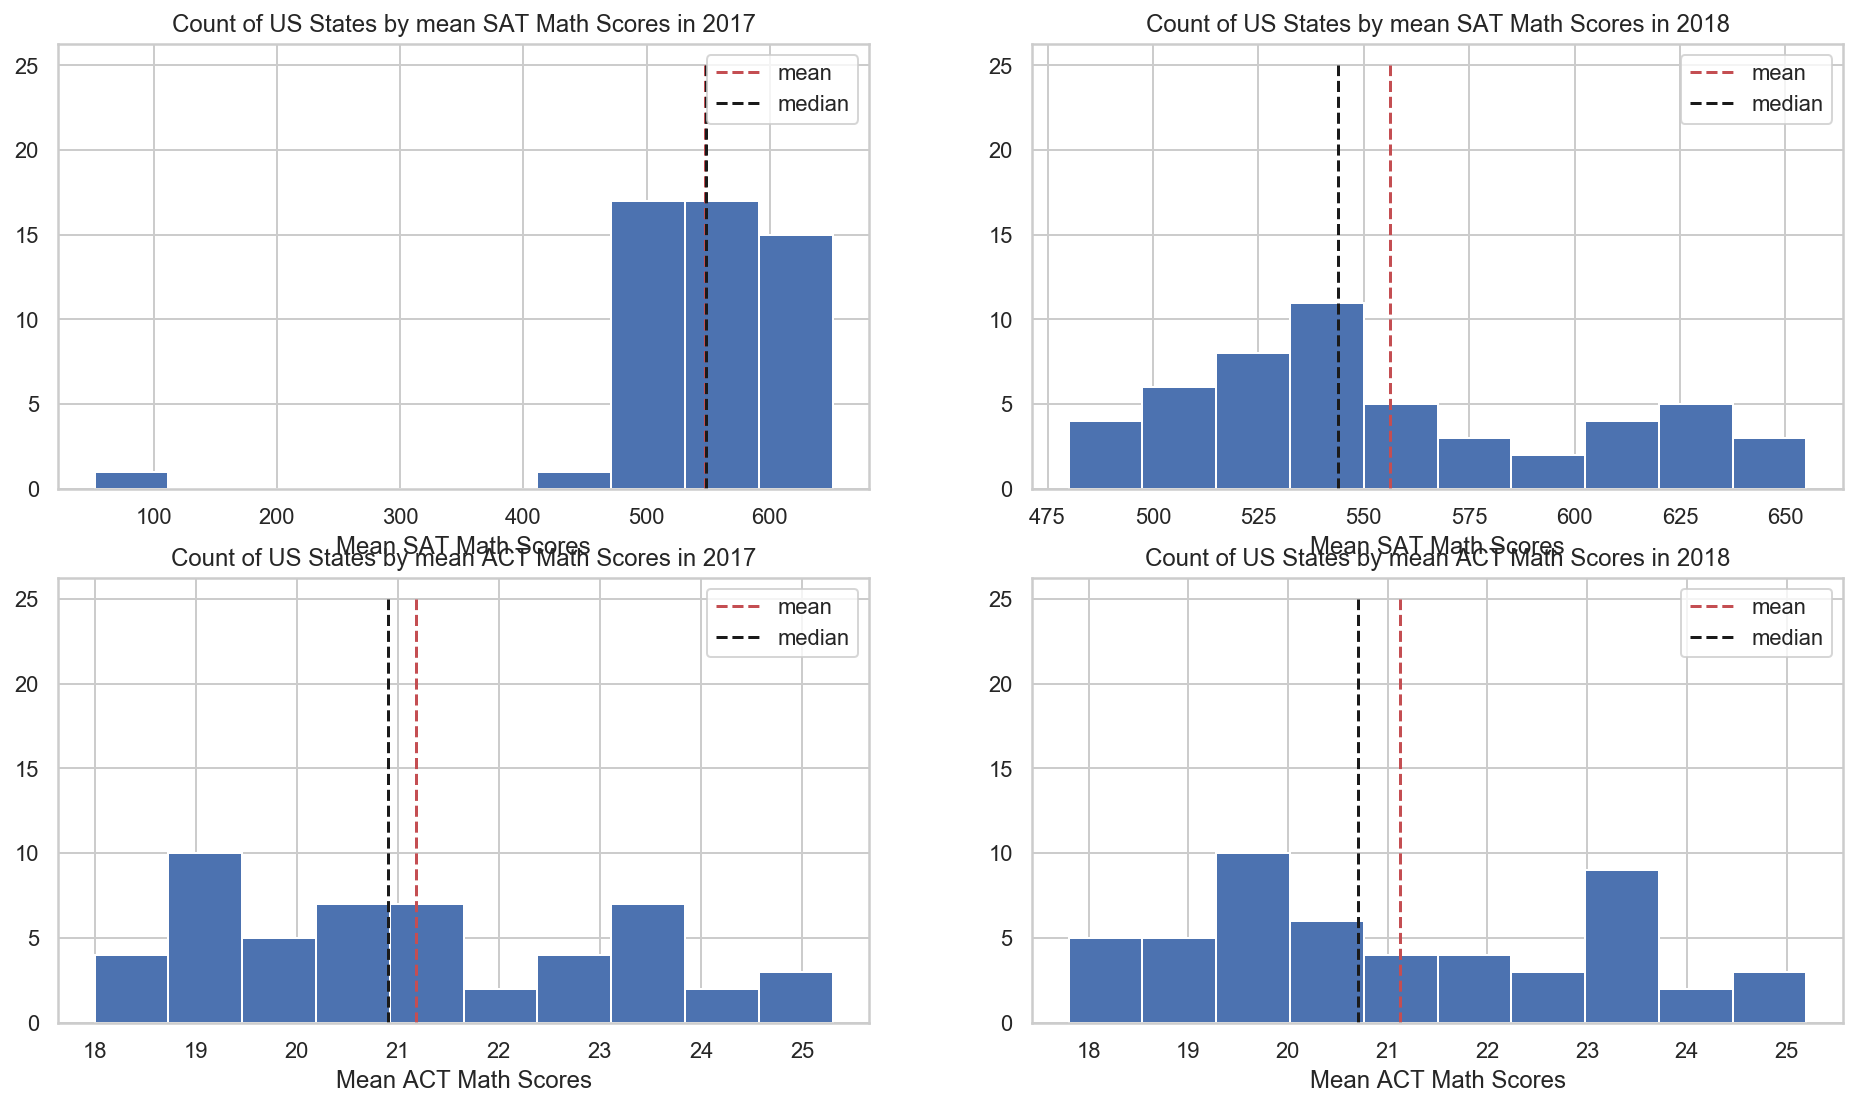

In [1411]:
#Math scores for SAT & ACT
subplot_histograms(merged_scores,['math_sat_17','math_sat_18','math_act_17','math_act_18'],['Count of US States by mean SAT Math Scores in 2017','Count of US States by mean SAT Math Scores in 2018','Count of US States by mean ACT Math Scores in 2017','Count of US States by mean ACT Math Scores in 2018'],['Mean SAT Math Scores','Mean SAT Math Scores','Mean ACT Math Scores','Mean ACT Math Scores'])

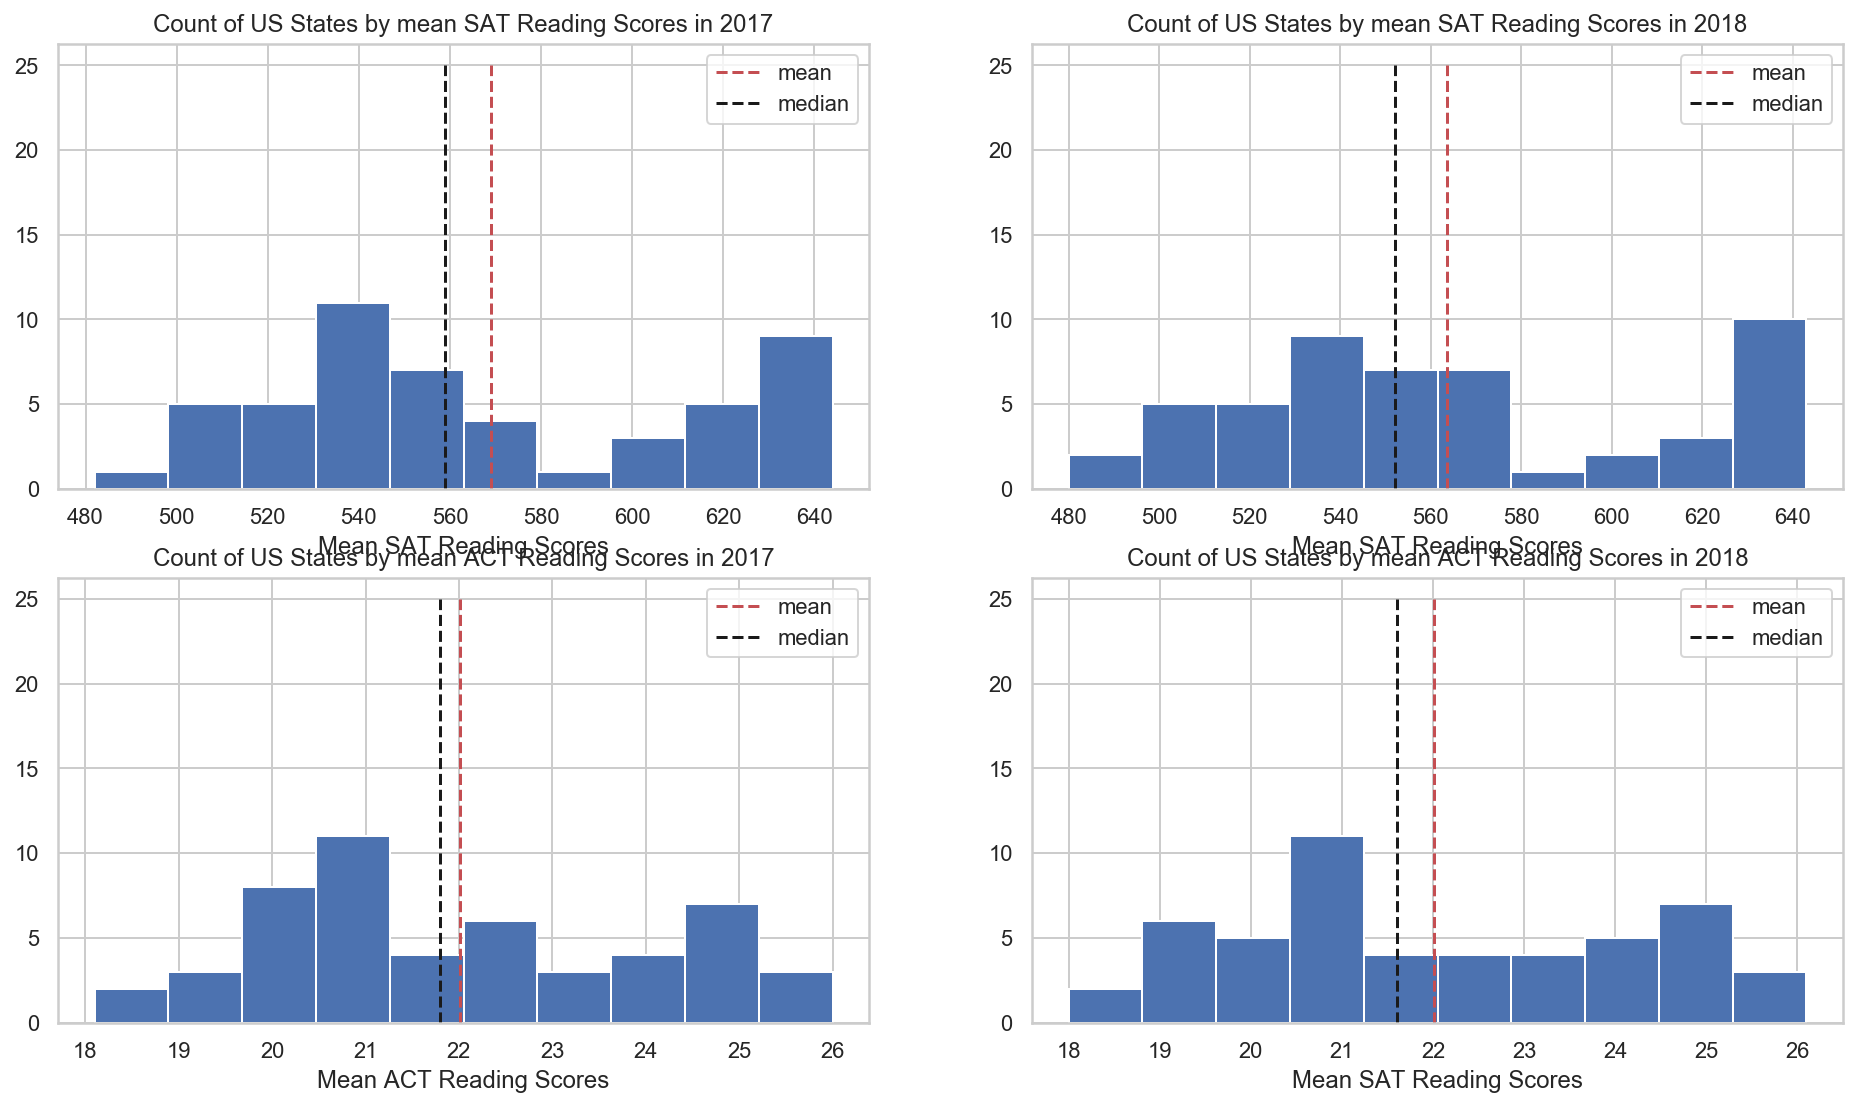

In [1412]:
#Reading/verbal scores for SAT & ACT
subplot_histograms(merged_scores,['reading_and_writing_sat_17','reading_and_writing_sat_18','reading_act_17','reading_act_18'],['Count of US States by mean SAT Reading Scores in 2017','Count of US States by mean SAT Reading Scores in 2018','Count of US States by mean ACT Reading Scores in 2017','Count of US States by mean ACT Reading Scores in 2018'],['Mean SAT Reading Scores','Mean SAT Reading Scores','Mean ACT Reading Scores','Mean SAT Reading Scores'])

Students tend to do better in the Reading Section for SAT compared to the Reading Section for ACT. There is a disproportionate number of states with mean Reading scores for SAT from 620 to 640. (i.e. 9 in 2017 vs 10 in 2018)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


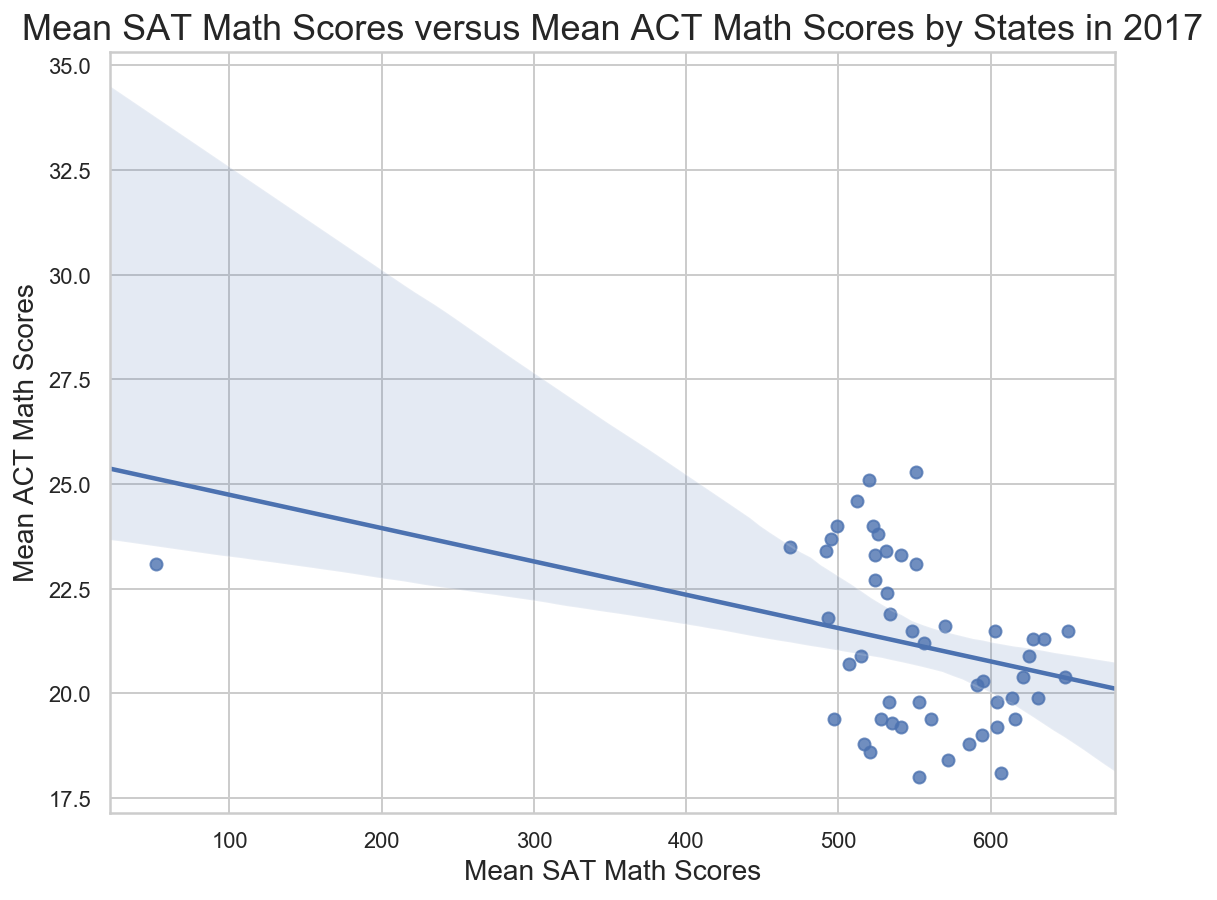

In [1413]:
# SAT vs. ACT math scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of SAT vs. ACT math scores for 2017.
sns.regplot(merged_scores.math_sat_17,
            merged_scores.math_act_17);

plt.title("Mean SAT Math Scores versus Mean ACT Math Scores by States in 2017", fontsize = 18)
plt.ylabel("Mean ACT Math Scores", fontsize = 14)
plt.xlabel("Mean SAT Math Scores", fontsize = 14);

There is a weak negative correlation between Mean SAT Math Scores in 2017 and Mean ACT Math Scores in 2017 across states.

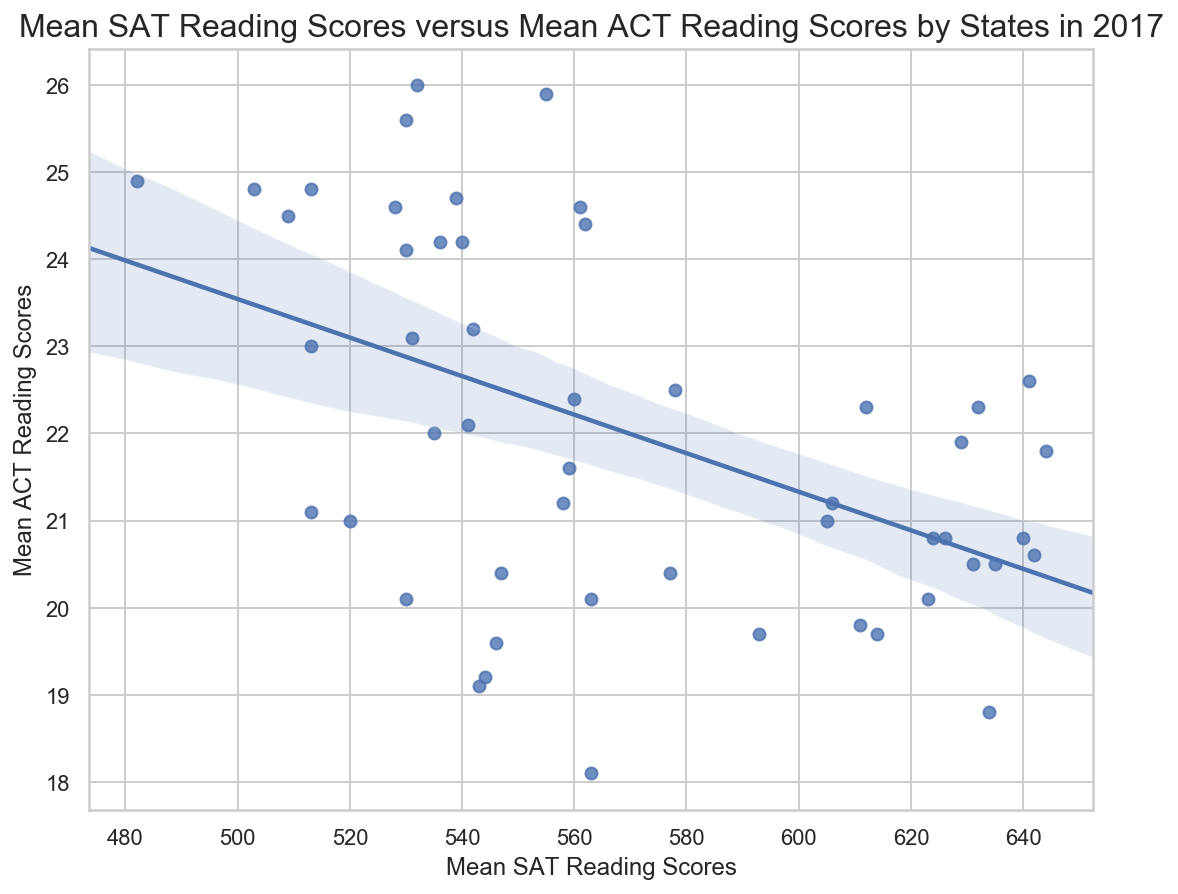

In [1414]:
# SAT vs. ACT verbal/reading scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of SAT vs. ACT verbal/reading scores for 2017.
sns.regplot(merged_scores.reading_and_writing_sat_17,
            merged_scores.reading_act_17);

plt.title("Mean SAT Reading Scores versus Mean ACT Reading Scores by States in 2017", fontsize = 16)
plt.ylabel("Mean ACT Reading Scores", fontsize = 12)
plt.xlabel("Mean SAT Reading Scores", fontsize = 12);

There is a weak negative correlation between Mean SAT Reading Scores in 2017 and Mean ACT Reading Scores in 2017 across states.

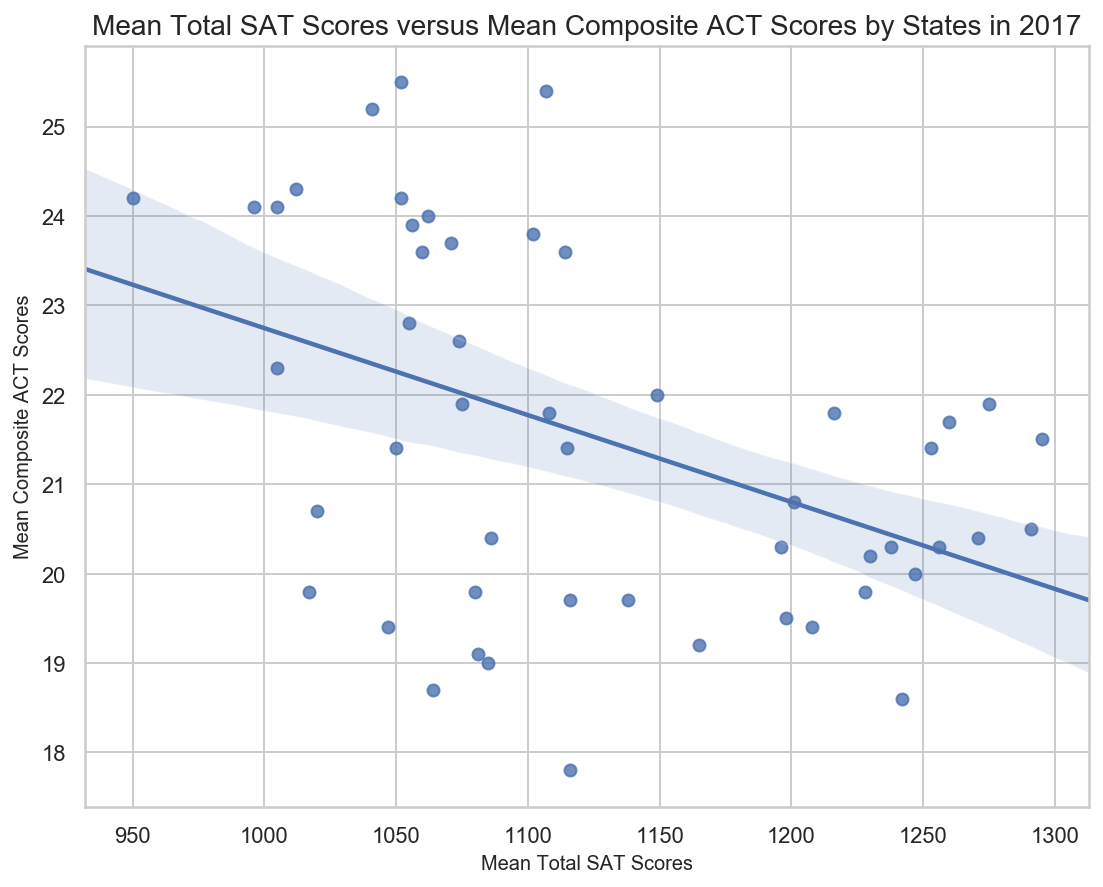

In [1415]:
# SAT vs. ACT total/composite scores for 2017
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of SAT vs. ACT total/composite scores for 2017.
sns.regplot(merged_scores.total_sat_17,
            merged_scores.composite_act_17);

plt.title("Mean Total SAT Scores versus Mean Composite ACT Scores by States in 2017", fontsize = 14)
plt.ylabel("Mean Composite ACT Scores", fontsize = 10)
plt.xlabel("Mean Total SAT Scores", fontsize = 10);

There is a weak negative correlation between Mean Total SAT Scores in 2017 and Mean Composite ACT Scores in 2017 across states.

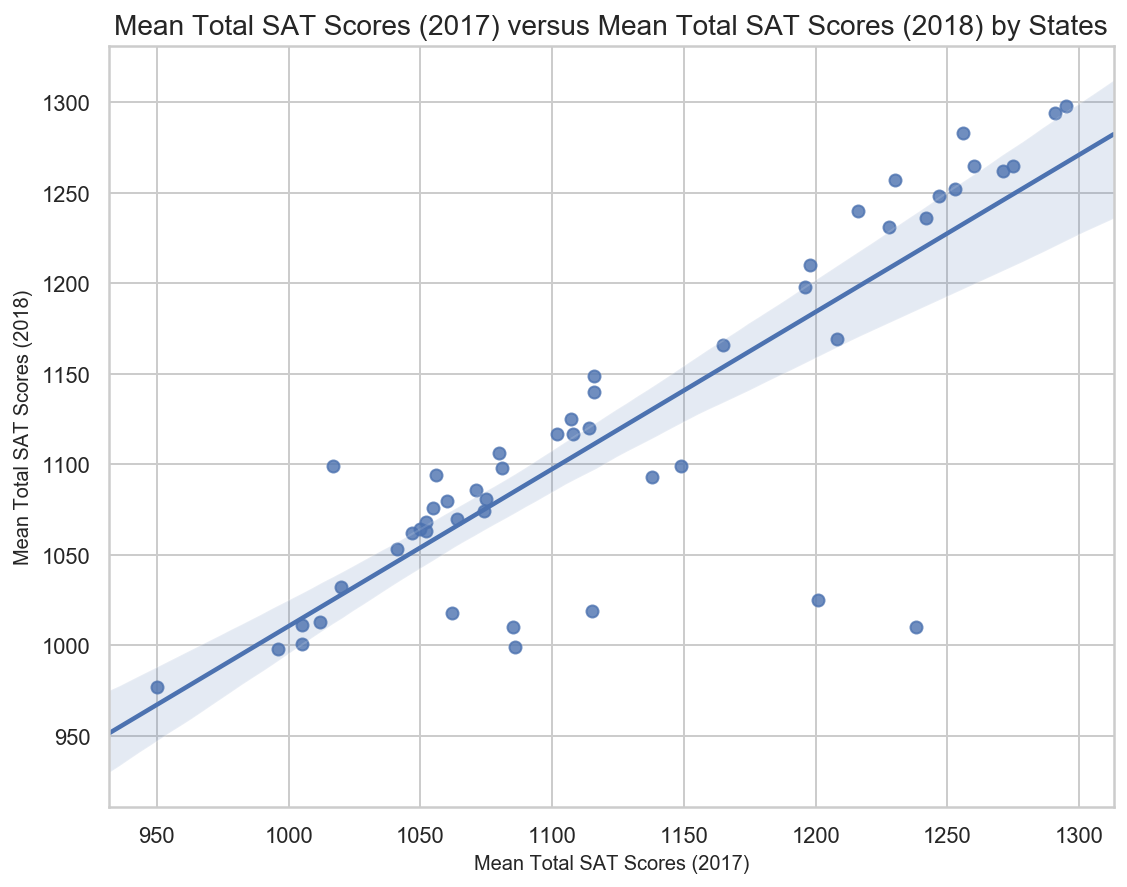

In [1416]:
# Total scores for SAT 2017 vs. 2018
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of Total scores for SAT 2017 vs. 2018.
sns.regplot(merged_scores.total_sat_17,
            merged_scores.total_sat_18);

plt.title("Mean Total SAT Scores (2017) versus Mean Total SAT Scores (2018) by States", fontsize = 14)
plt.ylabel("Mean Total SAT Scores (2018)", fontsize = 10)
plt.xlabel("Mean Total SAT Scores (2017)", fontsize = 10);

There is a strong positive correlation between Mean Total SAT Scores in 2017 and Mean Total SAT Scores in 2018 across states.

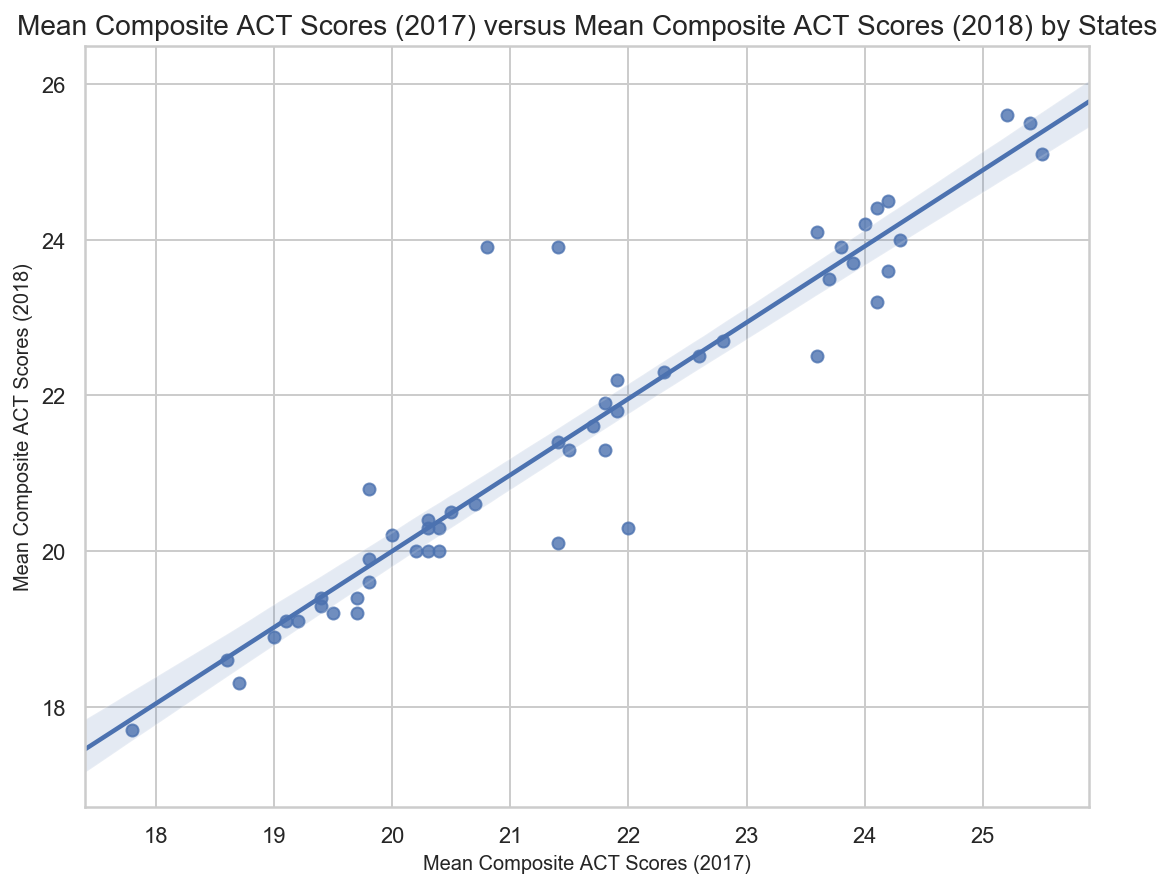

In [1417]:
# Composite scores for ACT 2017 vs. 2018
# Establish the size of the figure.
plt.figure(figsize=(9, 7))

# Create scatter plot of Composite scores for ACT 2017 vs. 2018.
sns.regplot(merged_scores.composite_act_17,
            merged_scores.composite_act_18);

plt.title("Mean Composite ACT Scores (2017) versus Mean Composite ACT Scores (2018) by States", fontsize = 14)
plt.ylabel("Mean Composite ACT Scores (2018)", fontsize = 10)
plt.xlabel("Mean Composite ACT Scores (2017)", fontsize = 10);

There is a strong positive correlation between Mean Composite ACT Scores in 2017 and Mean Composite ACT Scores in 2018 across states.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

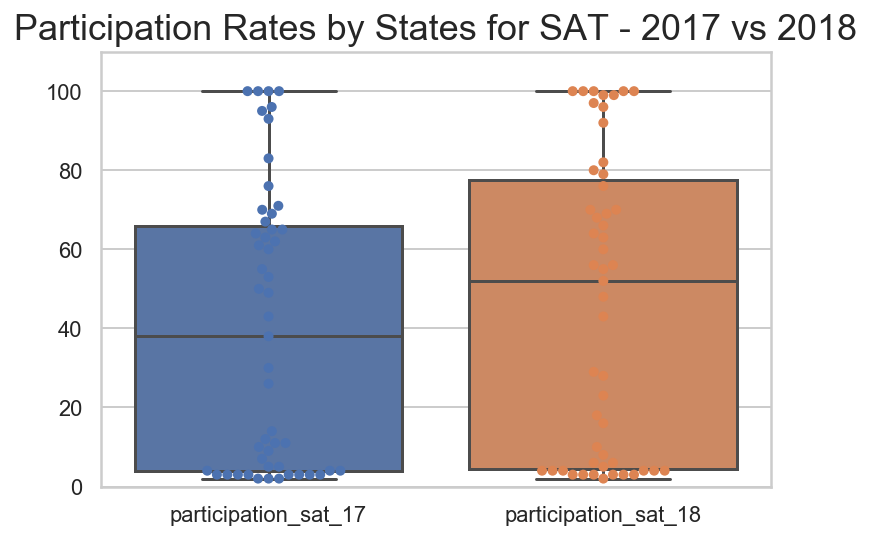

In [1418]:
# Boxplots for Participation Rates - SAT 2017 & SAT 2018
ax = sns.boxplot(data = [merged_scores['participation_sat_17'],merged_scores['participation_sat_18']])
ax = sns.swarmplot( data = [merged_scores['participation_sat_17'],merged_scores['participation_sat_18']])
ax = sns.set(rc={'figure.figsize':(9,8)})
plt.title('Participation Rates by States for SAT - 2017 vs 2018', fontsize=18);
plt.xticks([0, 1], ['participation_sat_17', 'participation_sat_18'])
plt.ylim(0, 110)
plt.show()

There is a significant increase in median participation rate by states for SAT from 2017 to 2018. (i.e. from 38% in 2017 to 52% in 2018.)

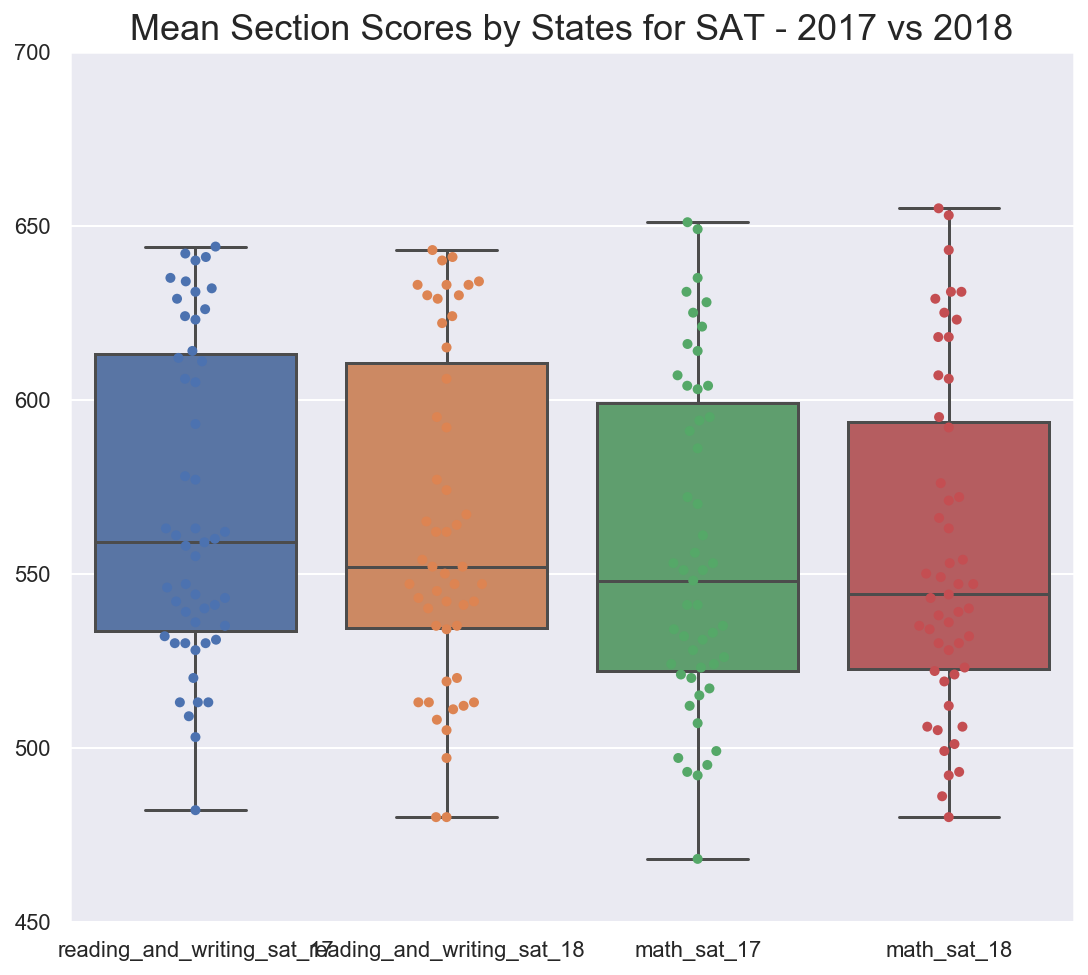

In [1419]:
# Boxplots for Mean Section Scores by States - SAT 2017 & SAT 2018
ax = sns.boxplot(data = [merged_scores['reading_and_writing_sat_17'],merged_scores['reading_and_writing_sat_18'],merged_scores['math_sat_17'],merged_scores['math_sat_18']])
ax = sns.swarmplot( data = [merged_scores['reading_and_writing_sat_17'],merged_scores['reading_and_writing_sat_18'],merged_scores['math_sat_17'],merged_scores['math_sat_18']])
ax = sns.set(rc={'figure.figsize':(12,10)})
plt.title('Mean Section Scores by States for SAT - 2017 vs 2018', fontsize=18);
plt.xticks([0, 1, 2, 3], ['reading_and_writing_sat_17', 'reading_and_writing_sat_18','math_sat_17','math_sat_18'], fontsize=11)
plt.ylim(450, 700)
plt.show()

There is a general downward trend in median average section scores by states for SAT from 2017 to 2018.
(i.e. EBRW - 559 in 2017 to 552 in 2018, Math - 548 in 2017 to 544 in 2018)

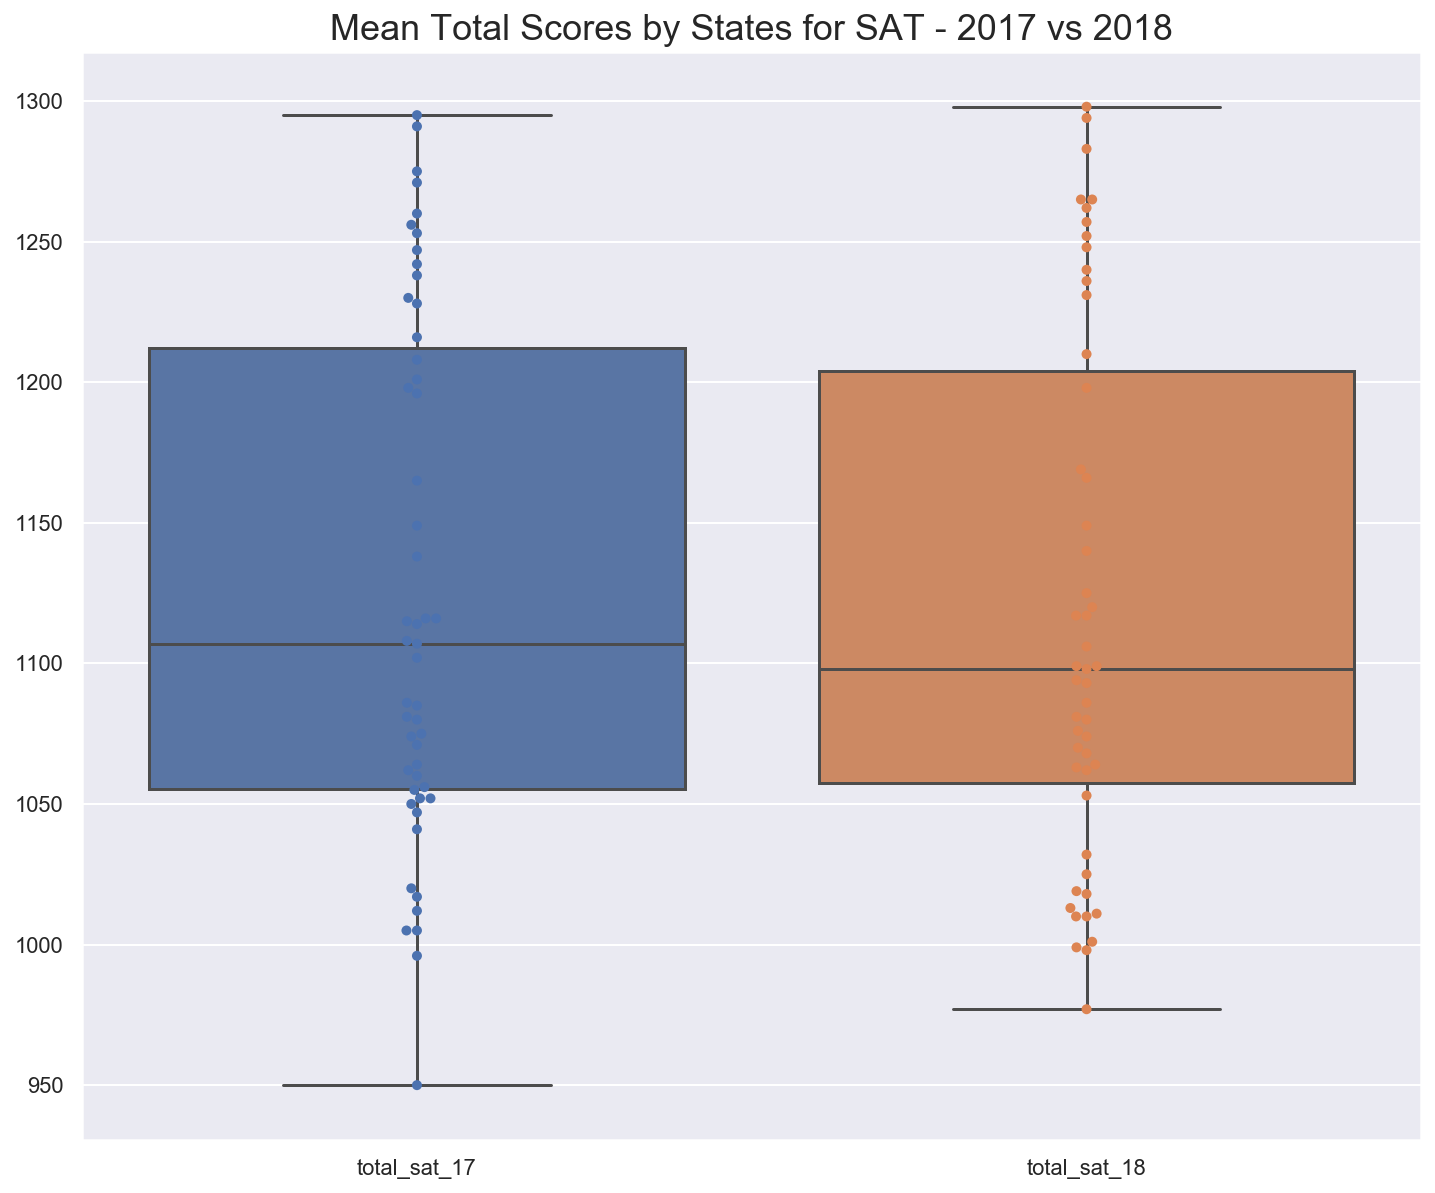

In [1420]:
# Boxplots for Mean Total Scores by States - SAT 2017 & SAT 2018
ax = sns.boxplot(data = [merged_scores['total_sat_17'],merged_scores['total_sat_18']])
ax = sns.swarmplot( data = [merged_scores['total_sat_17'],merged_scores['total_sat_18']])
ax = sns.set(rc={'figure.figsize':(9,8)})
plt.title('Mean Total Scores by States for SAT - 2017 vs 2018', fontsize=18);
plt.xticks([0, 1], ['total_sat_17', 'total_sat_18'])
plt.show()

Consequently, there is a decrease in median average total score for SAT by states from 2017 to 2018. (i.e. 1,107 in 2017 to 1,098 in 2018)

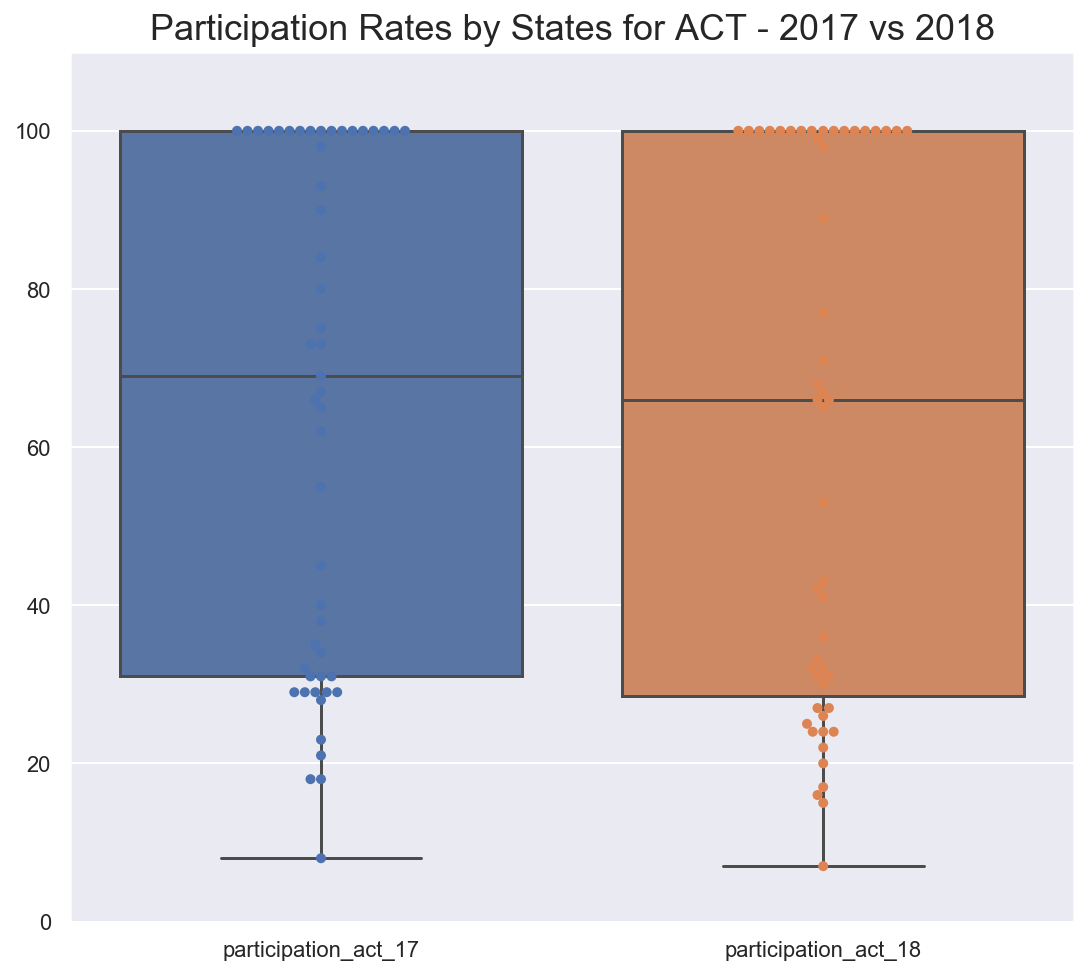

In [1421]:
# Boxplots for Participation Rates - ACT 2017 & ACT 2018
ax = sns.boxplot(data = [merged_scores['participation_act_17'],merged_scores['participation_act_18']])
ax = sns.swarmplot( data = [merged_scores['participation_act_17'],merged_scores['participation_act_18']])
ax = sns.set(rc={'figure.figsize':(9,8)})
plt.title('Participation Rates by States for ACT - 2017 vs 2018', fontsize=18);
plt.xticks([0, 1], ['participation_act_17', 'participation_act_18'])
plt.ylim(0, 110)
plt.show()

There is a slight decrease in median participation rate by states for ACT from 2017 to 2018. (i.e. from 69% in 2017 to 66% in 2018.)

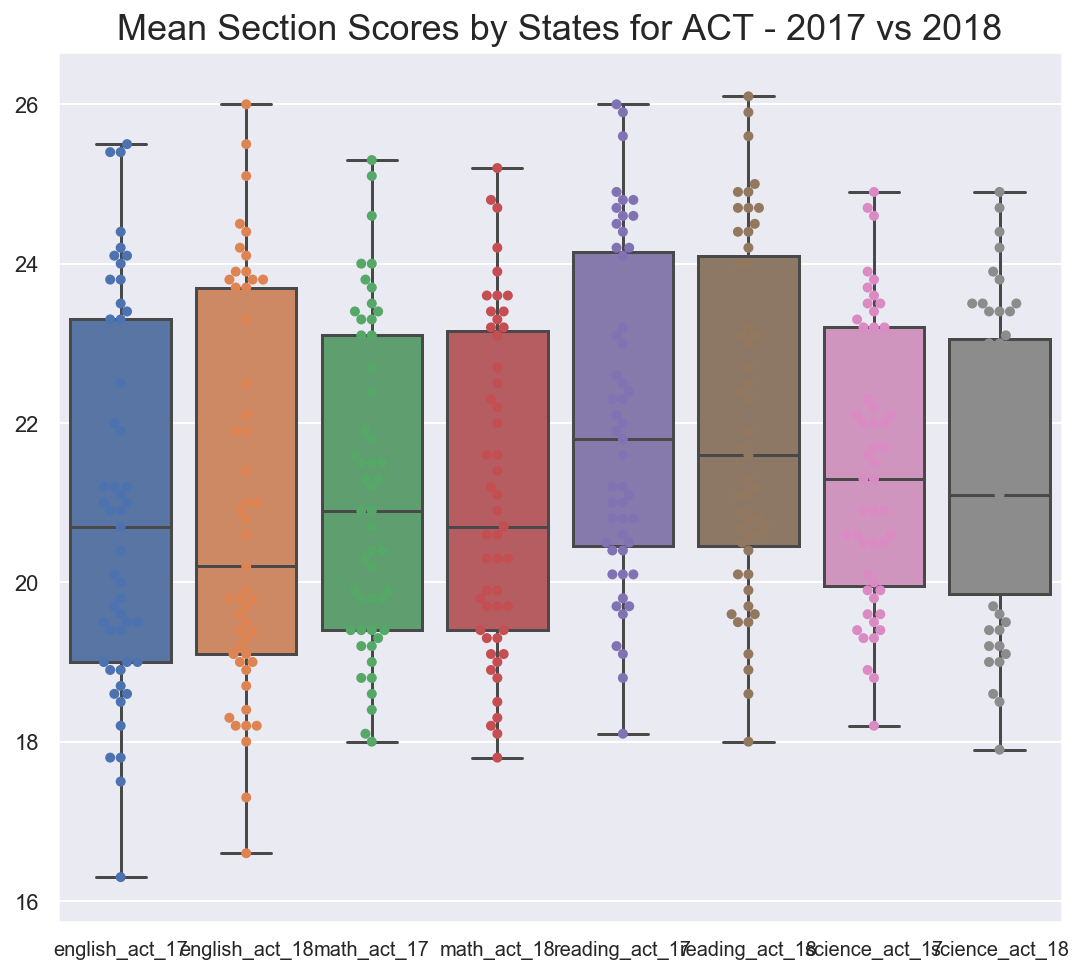

In [1422]:
# Boxplots for Mean Section Scores by States - ACT 2017 & ACT 2018
ax = sns.boxplot(data = [merged_scores['english_act_17'],merged_scores['english_act_18'],merged_scores['math_act_17'],merged_scores['math_act_18'],merged_scores['reading_act_17'],merged_scores['reading_act_18'],merged_scores['science_act_17'],merged_scores['science_act_18']])
ax = sns.swarmplot( data = [merged_scores['english_act_17'],merged_scores['english_act_18'],merged_scores['math_act_17'],merged_scores['math_act_18'],merged_scores['reading_act_17'],merged_scores['reading_act_18'],merged_scores['science_act_17'],merged_scores['science_act_18']])
ax = sns.set(rc={'figure.figsize':(14,10)})
plt.title('Mean Section Scores by States for ACT - 2017 vs 2018', fontsize=18);
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['english_act_17', 'english_act_18', 'math_act_17', 'math_act_18', 'reading_act_17', 'reading_act_18', 'science_act_17', 'science_act_18'], fontsize=10)
plt.show()

There is a general downward trend in median average section scores by states for ACT from 2017 to 2018.
(i.e. English - 20.7 in 2017 to 20.2 in 2018, Math - 20.9 in 2017 to 20.7 in 2018, Reading - 21.8 in 2017 to 21.6 in 2018, Science - 21.3 in 2017 to 21.1 in 2018)

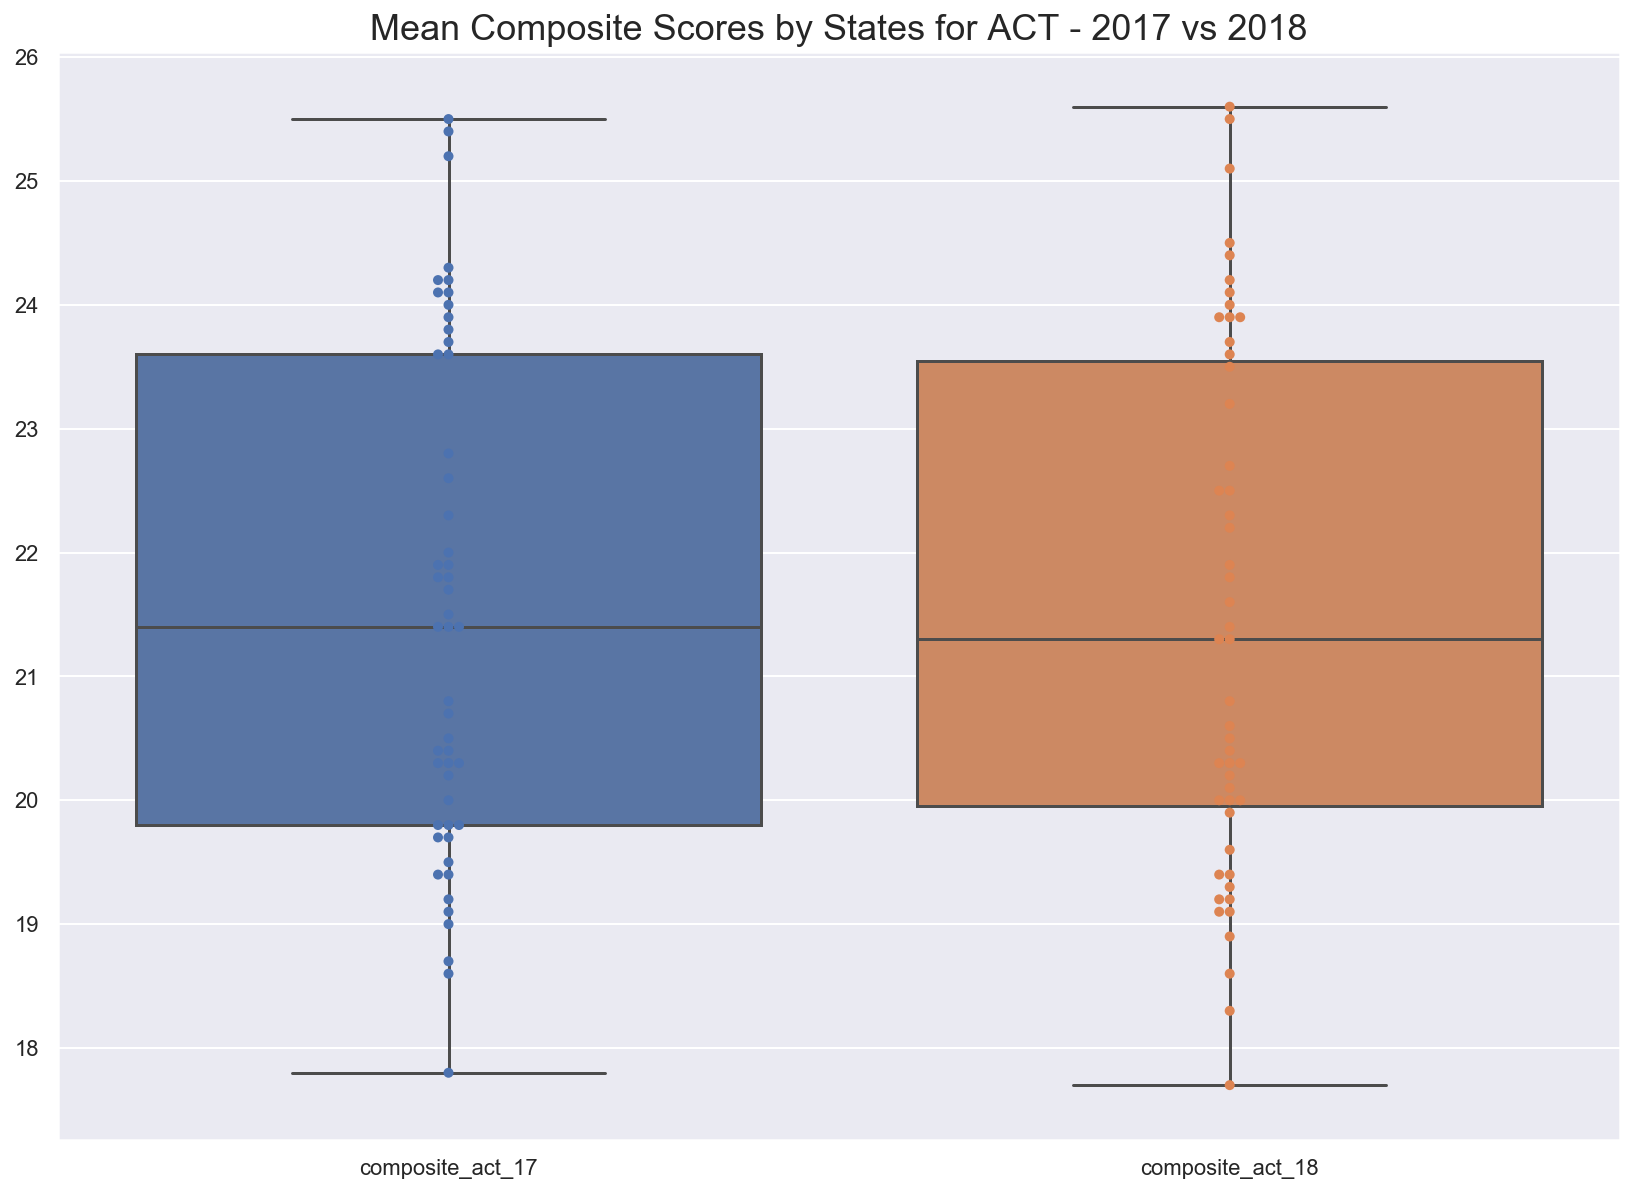

In [1423]:
# Boxplots for Mean Composite Scores by States - ACT 2017 & ACT 2018
ax = sns.boxplot(data = [merged_scores['composite_act_17'],merged_scores['composite_act_18']])
ax = sns.swarmplot( data = [merged_scores['composite_act_17'],merged_scores['composite_act_18']])
ax = sns.set(rc={'figure.figsize':(9,8)})
plt.title('Mean Composite Scores by States for ACT - 2017 vs 2018', fontsize=18);
plt.xticks([0, 1], ['composite_act_17', 'composite_act_18'])
plt.show()

Similarly, there is a decrease in median average composite score for ACT by states from 2017 to 2018. (i.e. 21.4 in 2017 to 21.3 in 2018)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [1424]:
merged_scores.columns

Index(['state', 'participation_sat_17', 'reading_and_writing_sat_17',
       'math_sat_17', 'total_sat_17', 'participation_act_17', 'english_act_17',
       'math_act_17', 'reading_act_17', 'science_act_17', 'composite_act_17',
       'participation_sat_18', 'reading_and_writing_sat_18', 'math_sat_18',
       'total_sat_18', 'participation_act_18', 'english_act_18', 'math_act_18',
       'reading_act_18', 'science_act_18', 'composite_act_18'],
      dtype='object')

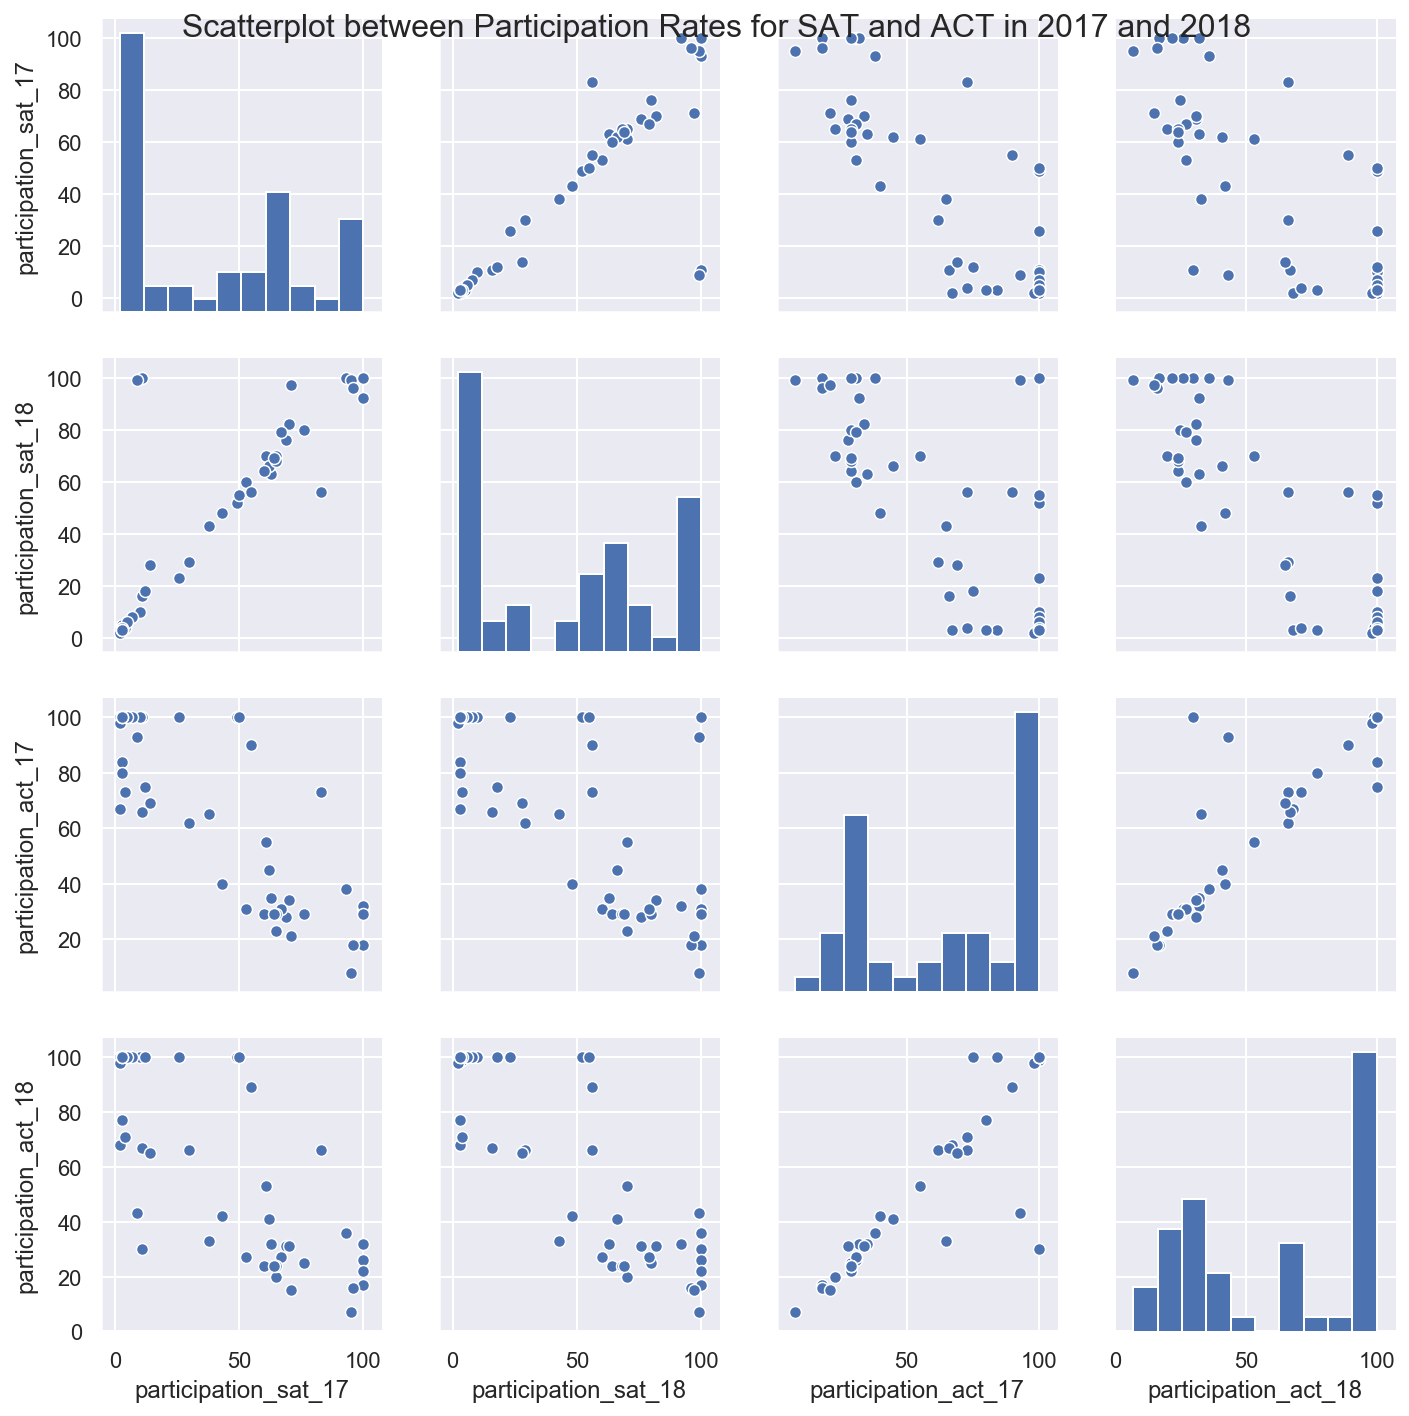

In [1425]:
#Scatterplot between Participation Rates for SAT and ACT in 2017 and 2018
sat_sections = sns.pairplot(merged_scores[['participation_sat_17','participation_sat_18','participation_act_17','participation_act_18']]);
fig = sat_sections.fig 
fig.suptitle('Scatterplot between Participation Rates for SAT and ACT in 2017 and 2018', fontsize=16);

There appears to be a negative correlation between SAT and ACT Participation Rates in 2017 and 2018.

As both SAT and ACT are college entrance exams which are accepted by all US colleges, most students tend to choose one over the other for their college admissions. The case of a student attempting both tests is generally assumed to be low as they are direct subsitutes for one another in most instances.

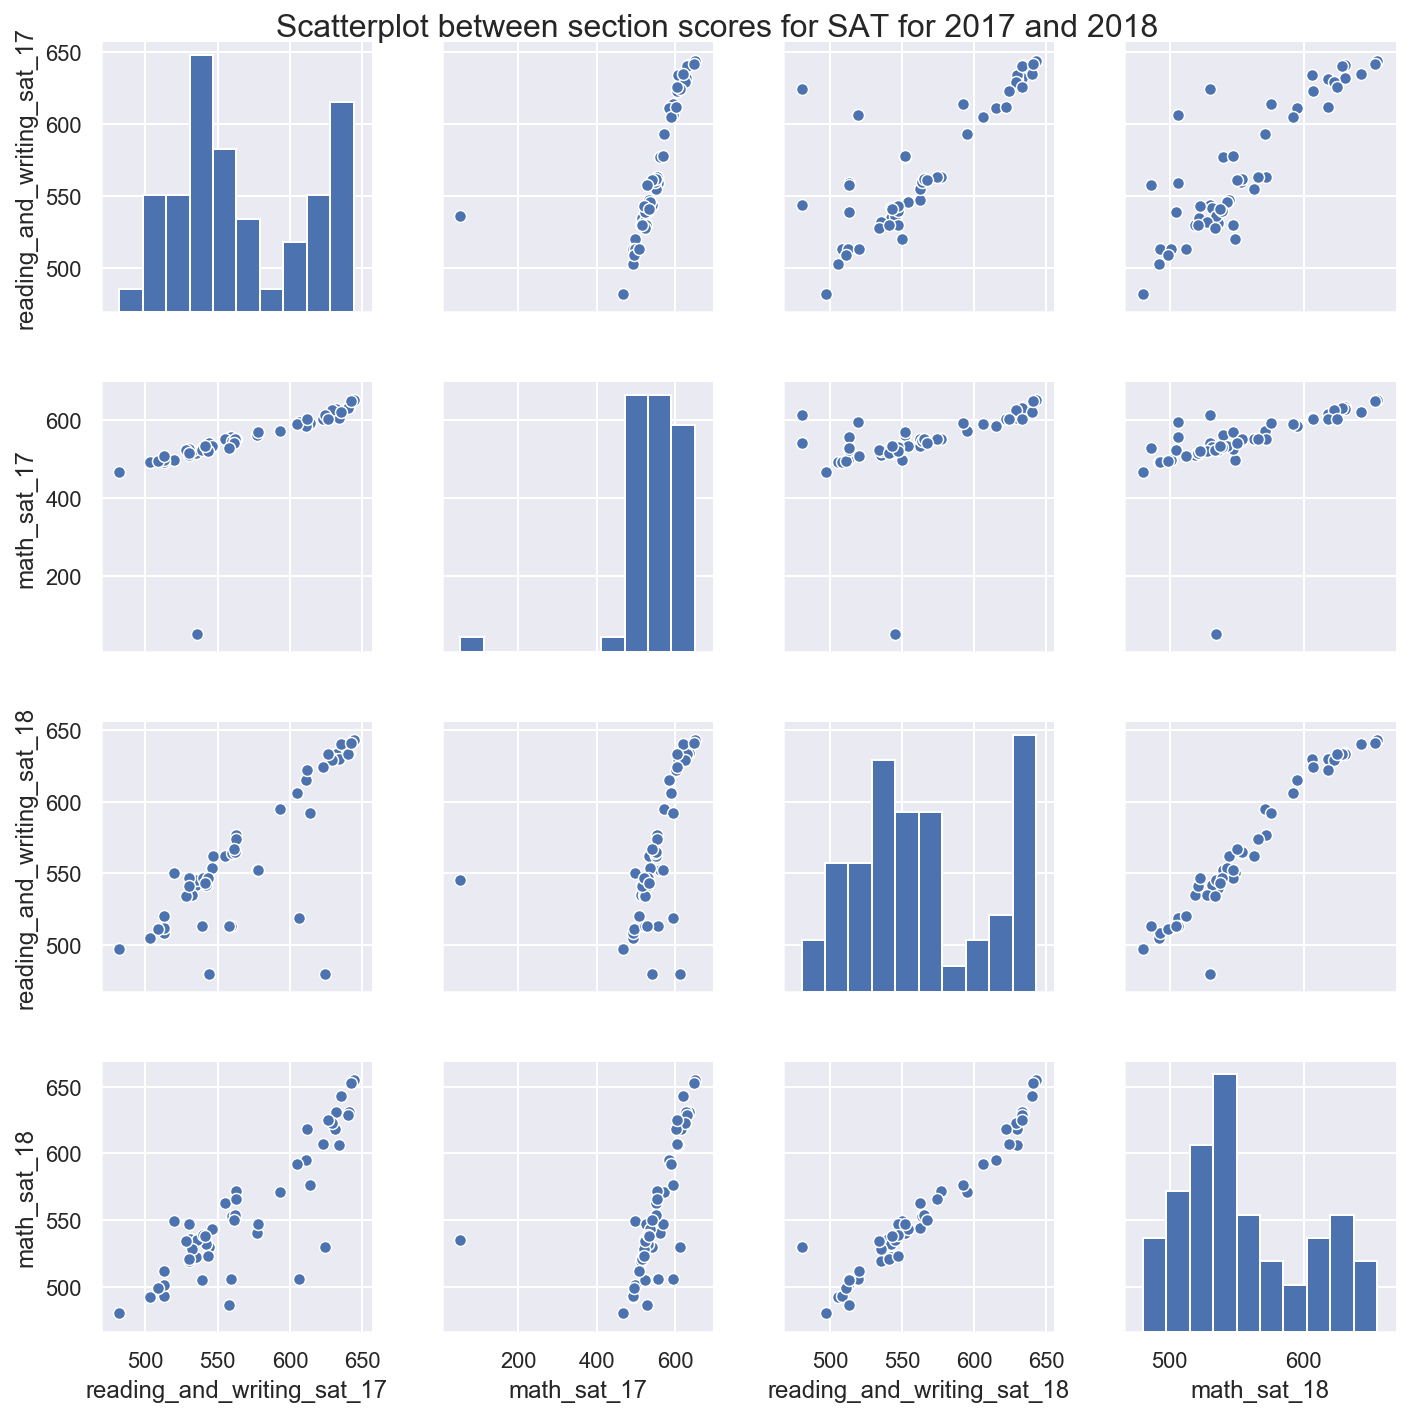

In [1426]:
#Scatterplot between section scores for SAT for 2017 and 2018.
sat_sections = sns.pairplot(merged_scores[['reading_and_writing_sat_17','math_sat_17','reading_and_writing_sat_18','math_sat_18']]);
fig = sat_sections.fig 
fig.suptitle('Scatterplot between section scores for SAT for 2017 and 2018', fontsize=16);

Students that do well in one particular Section, tend to do well in the other Sections in the same test, as evidenced from the strong positive linear association from the scatterplots. This applies to both SAT and ACT across both years - 2017 and 2018.

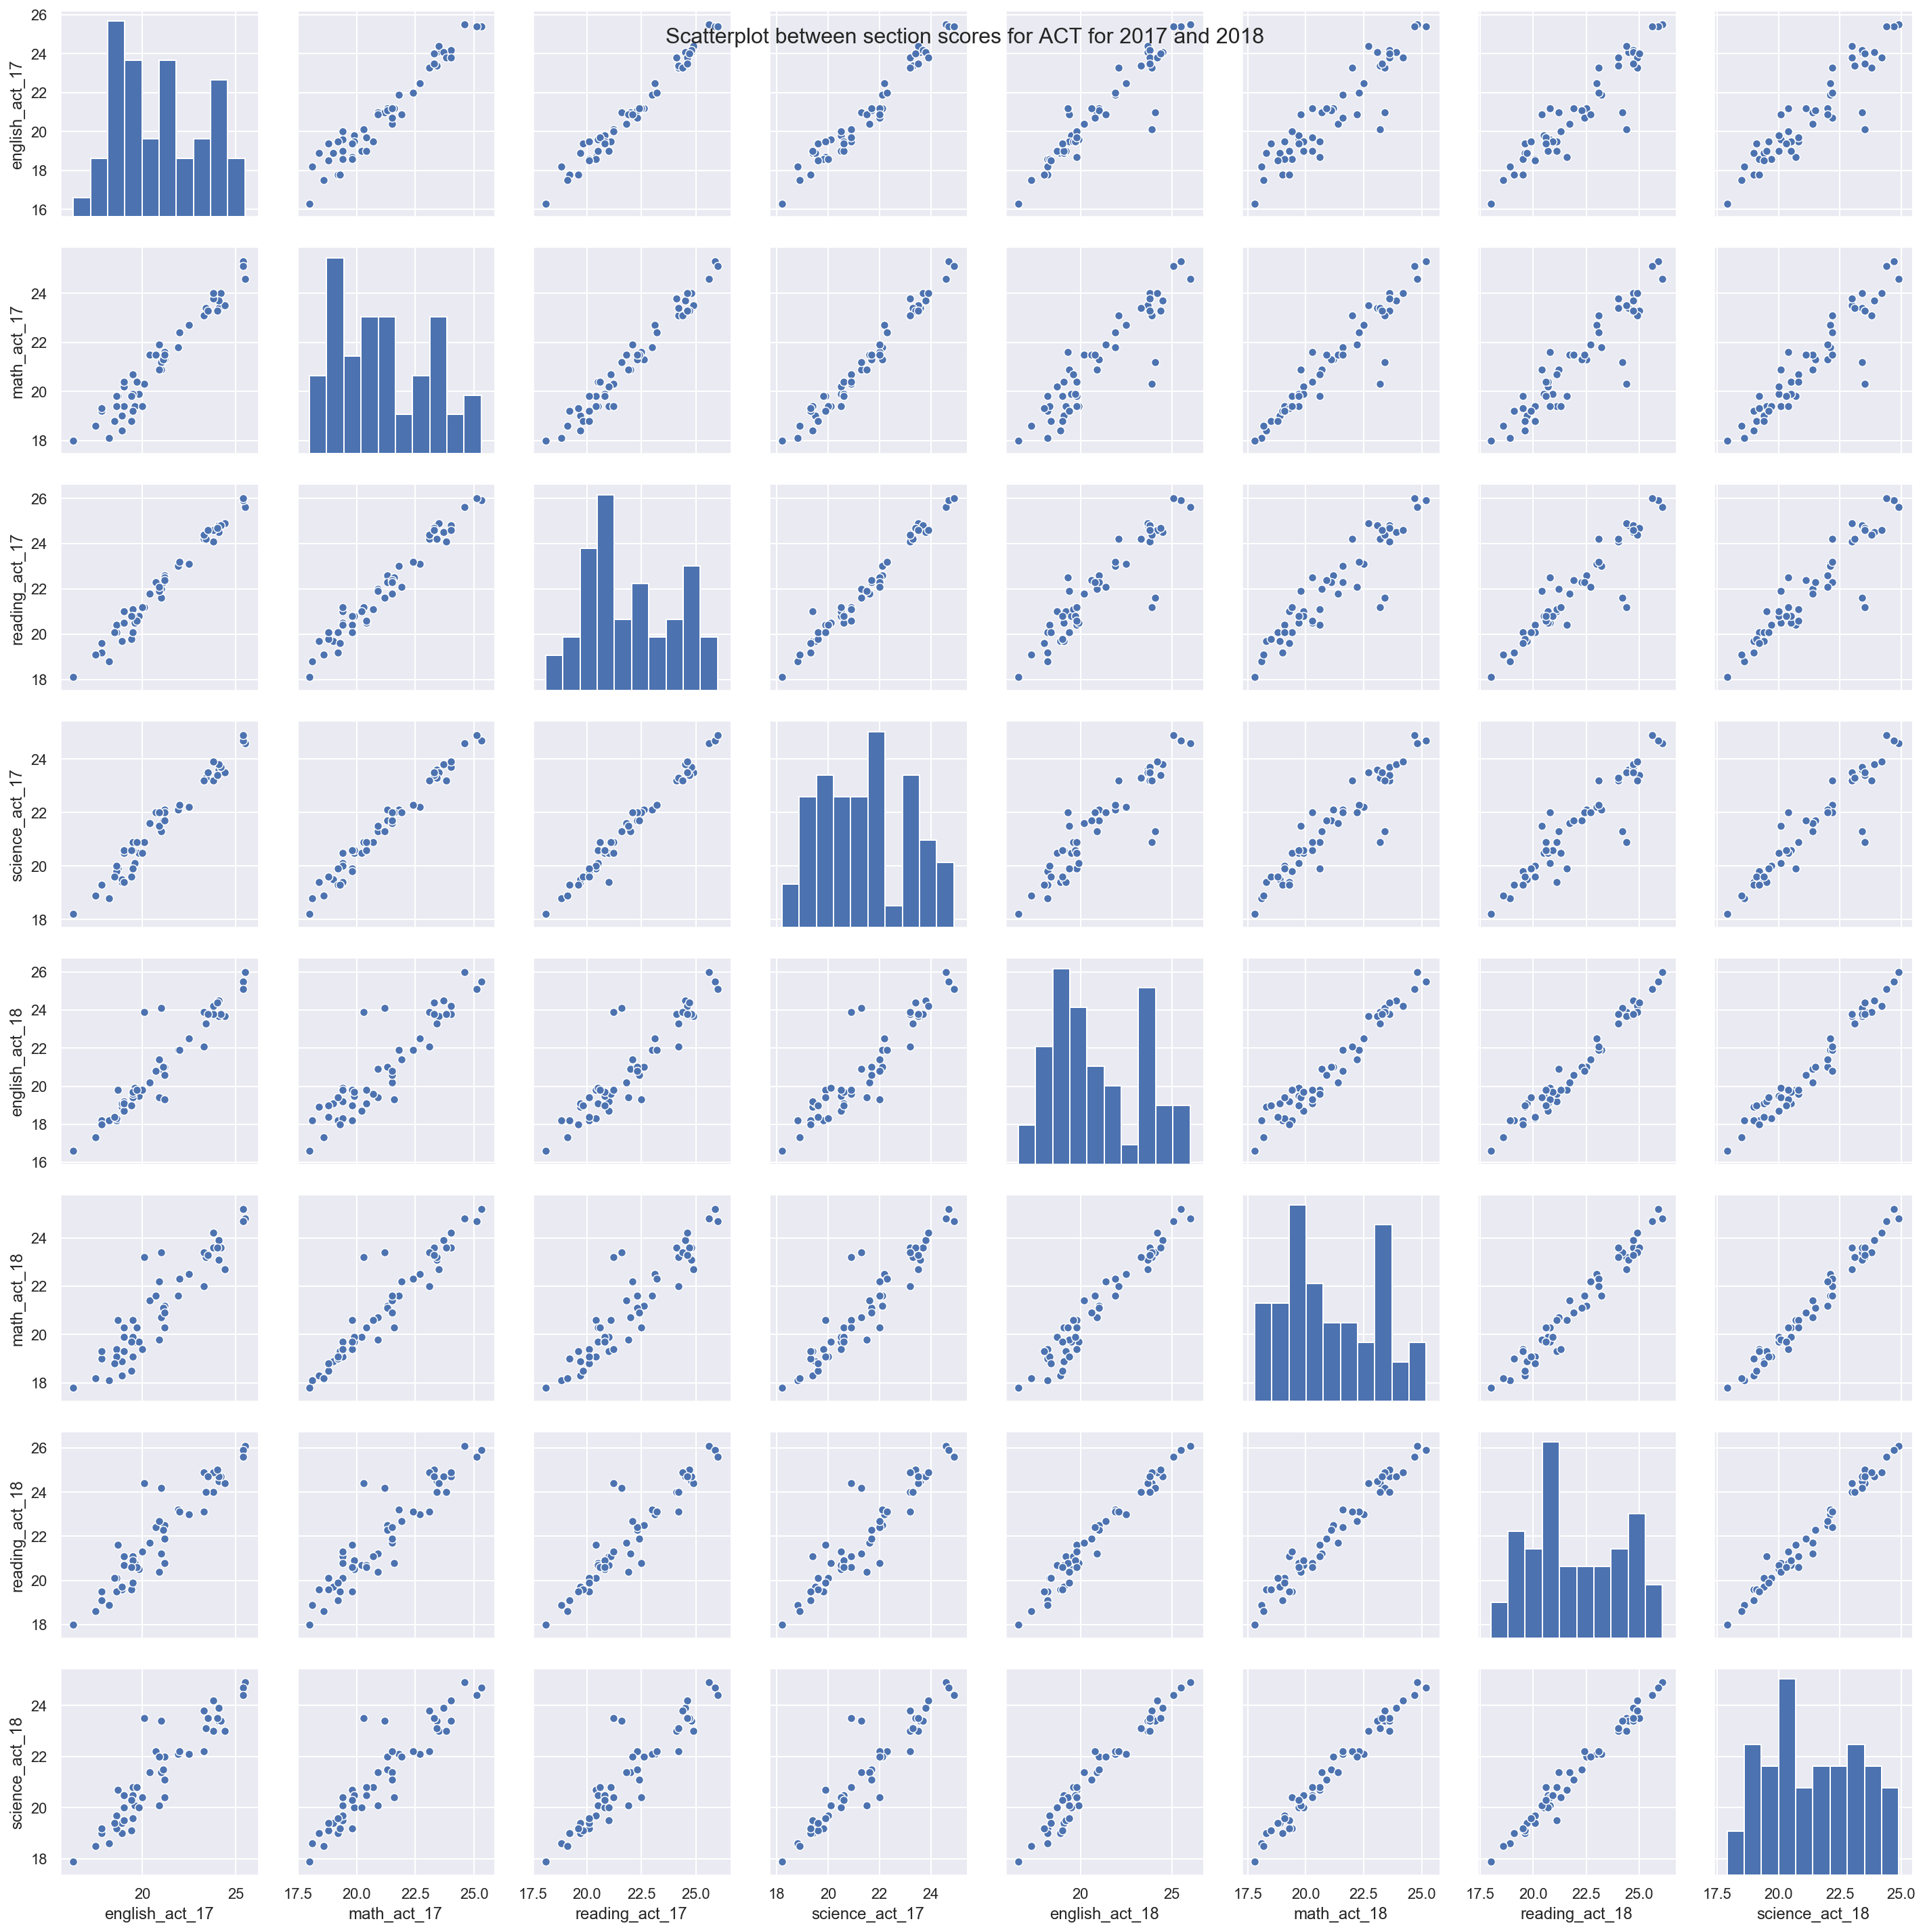

In [1427]:
#Scatterplot between section scores for ACT for 2017 and 2018.
act_sections = sns.pairplot(merged_scores[['english_act_17','math_act_17', 'reading_act_17', 'science_act_17','english_act_18', 'math_act_18','reading_act_18', 'science_act_18']]);
fig = act_sections.fig 
fig.suptitle('Scatterplot between section scores for ACT for 2017 and 2018', fontsize=16);

Students that do well in one particular Section, tend to do well in the other Sections in the same test, as evidenced from the strong positive linear association from the scatterplots. This applies to both SAT and ACT across both years - 2017 and 2018.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [1428]:
merged_scores.describe()

,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


## Answers:
1. There is a significant increase in median participation rate by states for SAT from 2017 to 2018. (i.e. from 38% in 2017 to 52% in 2018.)
2. There is a slight decrease in median participation rate by states for ACT from 2017 to 2018. (i.e. from 69% in 2017 to 66% in 2018.)
3. There is a general downward trend in median average section scores by states for SAT from 2017 to 2018.
(i.e. EBRW - 559 in 2017 to 552 in 2018, Math - 548 in 2017 to 544 in 2018)
4. There is a general downward trend in median average section scores by states for ACT from 2017 to 2018.
(i.e. English - 20.7 in 2017 to 20.2 in 2018, Math - 20.9 in 2017 to 20.7 in 2018, Reading - 21.8 in 2017 to 21.6 in 2018, Science - 21.3 in 2017 to 21.1 in 2018)
5. Consequently, there is a decrease in median average total score for SAT by states from 2017 to 2018. (i.e. 1,107 in 2017 to 1,098 in 2018)
6. Similarly, there is a decrease in median average composite score for ACT by states from 2017 to 2018. (i.e. 21.4 in 2017 to 21.3 in 2018)
7. There is a significant number of US States that has a participation rate of 0% to 10% in SAT for both 2017 and 2018. (21 in 2017 vs 18 in 2018) The distribution skews to the right.
8. There is a significant number of US States that has a participation rate of 90% to 100% in ACT for both 2017 and 2018. (20 in 2017 vs 20 in 2018) The distribution skews to the left.
9. Students tend to do better in the Reading Section for SAT compared to the Reading Section for ACT. There is a disproportionate number of states with mean Reading scores for SAT from 620 to 640. (i.e. 9 in 2017 vs 10 in 2018)
10. Students that do well in one particular Section, tend to do well in the other Sections in the same test, as evidenced from the strong positive correlation coefficients. This applies to both SAT and ACT.
11. There is a strong negative correlation between section/ test scores compared to participation rates. This applies to both SAT and ACT.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Based on the histograms plotted above, the data sampled from the population generally follows a normal distribution.
However, this assumption does not appear to hold true for the Reading Scores for SAT and Participation Rates for both SAT and ACT.
1. There is a significant number of US States that has a participation rate of 0% to 10% in SAT for both 2017 and 2018. (21 in 2017 vs 18 in 2018) The distribution skews to the right.
2. There is a significant number of US States that has a participation rate of 90% to 100% in ACT for both 2017 and 2018. (20 in 2017 vs 20 in 2018) The distribution skews to the left.
3. Students tend to do better in the Reading Section for SAT compared to the Reading Section for ACT. There is a disproportionate number of states with mean Reading scores for SAT from 620 to 640. (i.e. 9 in 2017 vs 10 in 2018)

In [1429]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
def norm_test(data):
    alpha = 0.05
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [1430]:
norm_test(merged_scores['participation_sat_17'])

Statistics=0.854, p=0.000
Sample does not look Gaussian (reject H0)


Based on the Shapiro-Wilk test, participation rates for SAT in 2017 does not look likely that it is drawn from a Gaussian distribution.

In [1431]:
norm_test(merged_scores['participation_sat_18'])

Statistics=0.856, p=0.000
Sample does not look Gaussian (reject H0)


Based on the Shapiro-Wilk test, participation rates for SAT in 2018 does not look likely that it is drawn from a Gaussian distribution.

In [1432]:
norm_test(merged_scores['participation_act_17'])

Statistics=0.840, p=0.000
Sample does not look Gaussian (reject H0)


Based on the Shapiro-Wilk test, participation rates for ACT in 2017 does not look likely that it is drawn from a Gaussian distribution.

In [1433]:
norm_test(merged_scores['participation_act_18'])

Statistics=0.826, p=0.000
Sample does not look Gaussian (reject H0)


Based on the Shapiro-Wilk test, participation rates for ACT in 2018 does not look likely that it is drawn from a Gaussian distribution.

In [1434]:
norm_test(merged_scores['reading_and_writing_sat_17'])

Statistics=0.921, p=0.002
Sample does not look Gaussian (reject H0)


Based on the Shapiro-Wilk test, Reading and Writing Scores for SAT in 2017 does not look likely that it is drawn from a Gaussian distribution.

In [1435]:
norm_test(merged_scores['reading_and_writing_sat_18'])

Statistics=0.927, p=0.004
Sample does not look Gaussian (reject H0)


Based on the Shapiro-Wilk test, Reading and Writing Scores for SAT in 2018 does not look likely that it is drawn from a Gaussian distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

Both SAT and ACT are college entrance exams which are accepted by all US colleges. Hence, it makes sense to conduct a statistical inference between the participation rates of both tests as most students tend to choose one over the other for their college admissions. The case of a student attempting both tests is generally assumed to be low as they are direct subsitutes for one another in most instances.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

It might not be appropriate to compare the SAT to ACT math scores - 
1. They are based on different scales. (SAT score is scaled between 200 and 800 while ACT score is scaled between 1 and 36)
2. The difficulty level of the two tests are subjective and difficult to compare.
3. The test format is significantly different. (ACT is all multiple-choice while SAT is 80% multiple-choice and 20% open-ended) (ACT allows caculator usage for the entire test while SAT does not allow caculator usage for a portion of the test)
4. The syllabus of the two tests and the weightage of certain topics differ. (i.e. Geometry-related questions make up a larger percentage of questions tested in ACT compared to SAT)

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [1436]:
# Pearson's Correlation test between SAT Participation Rate in 2017 and SAT Participation Rate in 2018
#H0: the two samples are independent.
#H1: there is a dependency between the samples.
from scipy.stats import pearsonr
stat, p = pearsonr(merged_scores['participation_sat_17'], 
                   merged_scores['participation_sat_18'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.875, p=0.000
Probably dependent


As p-value < 0.05, we reject the null hypthesis and conclude that there is a linear relationship between SAT Participation Rates in 2017 and 2018 and the correlation is statistically significant.

In [1437]:
# Pearson's Correlation test between ACT and ACT Participation Rate in 2018
#H0: the two samples are independent.
#H1: there is a dependency between the samples.
from scipy.stats import pearsonr
stat, p = pearsonr(merged_scores['participation_act_17'], merged_scores['participation_act_18'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.919, p=0.000
Probably dependent


As p-value < 0.05, we reject the null hypthesis and conclude that there is a linear relationship between ACT Participation Rates in 2017 and 2018 and the correlation is statistically significant.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**States which require SAT**

"The College Board offers a program called SAT School Day, which, as the name suggests, allows schools to offer the SAT to students during the week, generally for free."

"In some states, all high school juniors are required to take the SAT under this program, while in others only some are."

"In total, 20 states (plus Washington, DC) are contracted with the College Board to administer the SAT to some or all high school juniors for free."

Example of states are Connecticut, Delaware, Michigan,etc.

**Connecticut**

"As of the 2015-16 school year, all Connecticut juniors will take the SAT."
 
**Delaware**

"In 2016, the SAT replaced Delaware's Smarter Assessment state test for 11th graders."

**District of Columbia**

"Although it's not required, the SAT is offered for free to all juniors and seniors in Washington, DC."

Reference : https://blog.prepscholar.com/which-states-require-the-sat

**States which require ACT**

"Over the past five years, the number of states that administer the ACT statewide has more than doubled: there are now 12 states that require every junior to take the test and eight more that either require the test in some districts or offer it as a free option for students who wish to take it."

Example of states are Alabama, Kentucky, Lousiana, etc.

Reference: https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice

In [1438]:
merged_scores[(merged_scores['participation_sat_17'] < 60) & (merged_scores['participation_act_17'] < 60)]

,state,participation_sat_17,reading_and_writing_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,...,participation_sat_18,reading_and_writing_sat_18,math_sat_18,total_sat_18,participation_act_18,english_act_18,math_act_18,reading_act_18,science_act_18,composite_act_18
4,California,53.0,531.0,524.0,1055.0,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7
37,Oregon,43.0,560.0,548.0,1108.0,40,21.2,21.5,22.4,21.7,...,48,564,553,1117,42,20.6,20.9,21.9,21.1,21.3


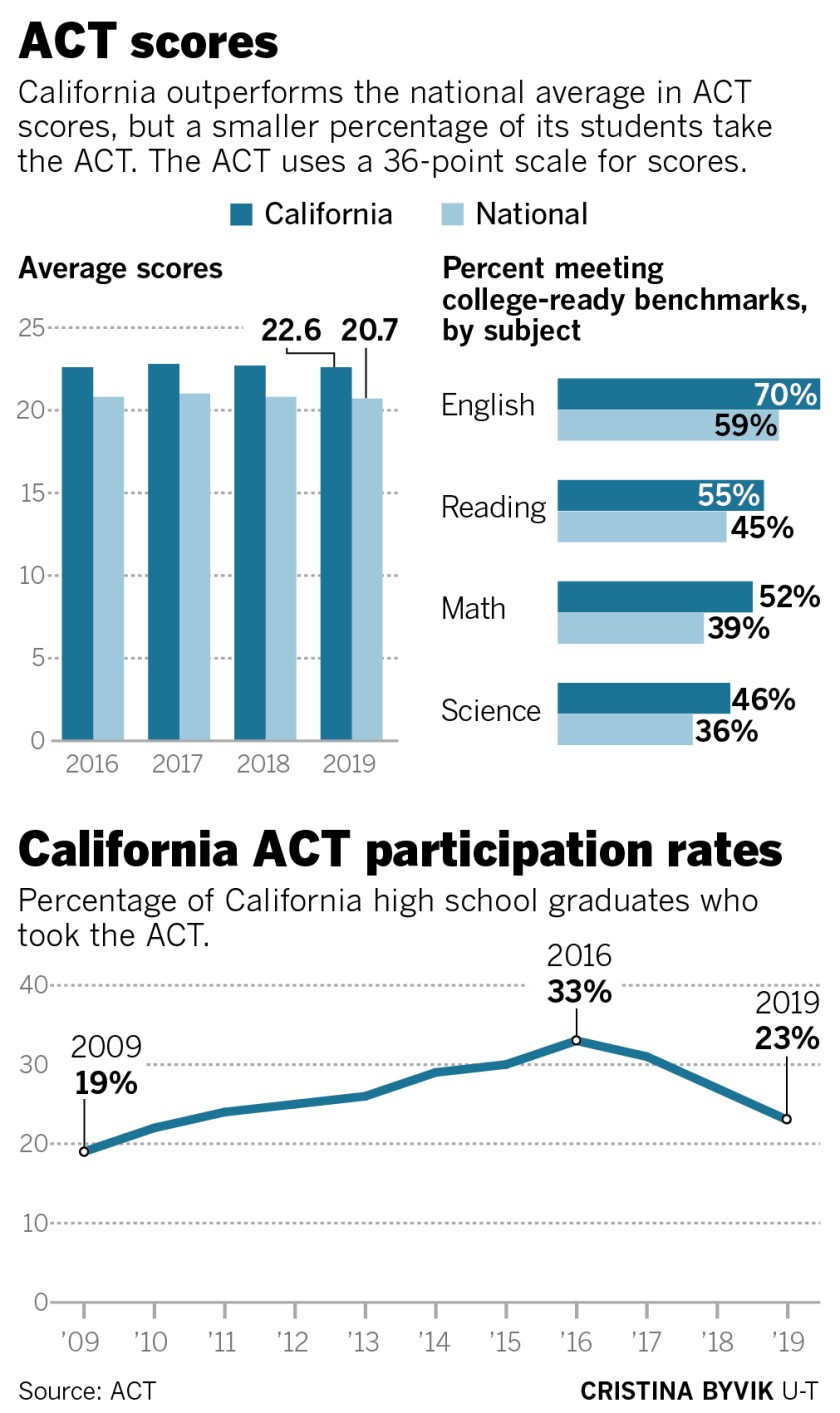

In [1439]:
from IPython.display import Image
Image("cali_act.jpeg",width=350)

**Declining ACT Participation Rate in California**

"Meanwhile, California’s ACT participation rate has declined for the past three years. About 23 percent of California’s 2019 graduating class took the ACT, compared to about 30 percent of its 2015 graduating class."

**Critics of Standardized Tests**

"Critics of the standardized tests say test performance is closely correlated with — and therefore likely influenced by — family incomes, parent education levels and race. They argue that using the tests for college admissions discriminates against disadvantaged students, including students of color, poor students and students with disabilities."

“The test serves no purpose other than to act as a barrier to higher education for historically disadvantaged students.” said Lisa Holder of the Equal Justice Society in a statement.

**ACT and College Board Response**

"The ACT and College Board say they have taken steps to make tests more accessible. Both provide fee waivers for low-income students and free test-prep materials."

Reference: https://www.sandiegouniontribune.com/news/education/story/2019-10-31/act-scores

In [1440]:
california_act = merged_scores[merged_scores['state']=='California']
california_act = california_act.drop(['participation_sat_17', 'reading_and_writing_sat_17','math_sat_17', 'total_sat_17', 'english_act_17','math_act_17', 'reading_act_17', 'science_act_17', 'composite_act_17','participation_sat_18', 'reading_and_writing_sat_18', 'math_sat_18','total_sat_18', 'english_act_18', 'math_act_18','reading_act_18', 'science_act_18', 'composite_act_18'], axis=1)
california_act.reset_index(drop=True, inplace=True)
california_act

,state,participation_act_17,participation_act_18
0,California,31,27


In [1441]:
national_act_17 = int(merged_scores['participation_act_17'].mean())
national_act_18 = int(merged_scores['participation_act_18'].mean())
print(national_act_17)
print(national_act_18)

65
61


In [1442]:
national_act = pd.DataFrame({'state': ['National Average'],
                    'participation_act_17': [national_act_17],
                    'participation_act_18': [national_act_18]},
                    index=[1])
california_act = pd.concat([california_act, national_act], axis=0)
california_act = california_act.rename({'state': '', 'participation_act_17': '2017', 'participation_act_18' : '2018'}, axis=1)
california_act.set_index('', inplace=True)
california_act

,2017,2018
,,
California,31,27
National Average,65,61


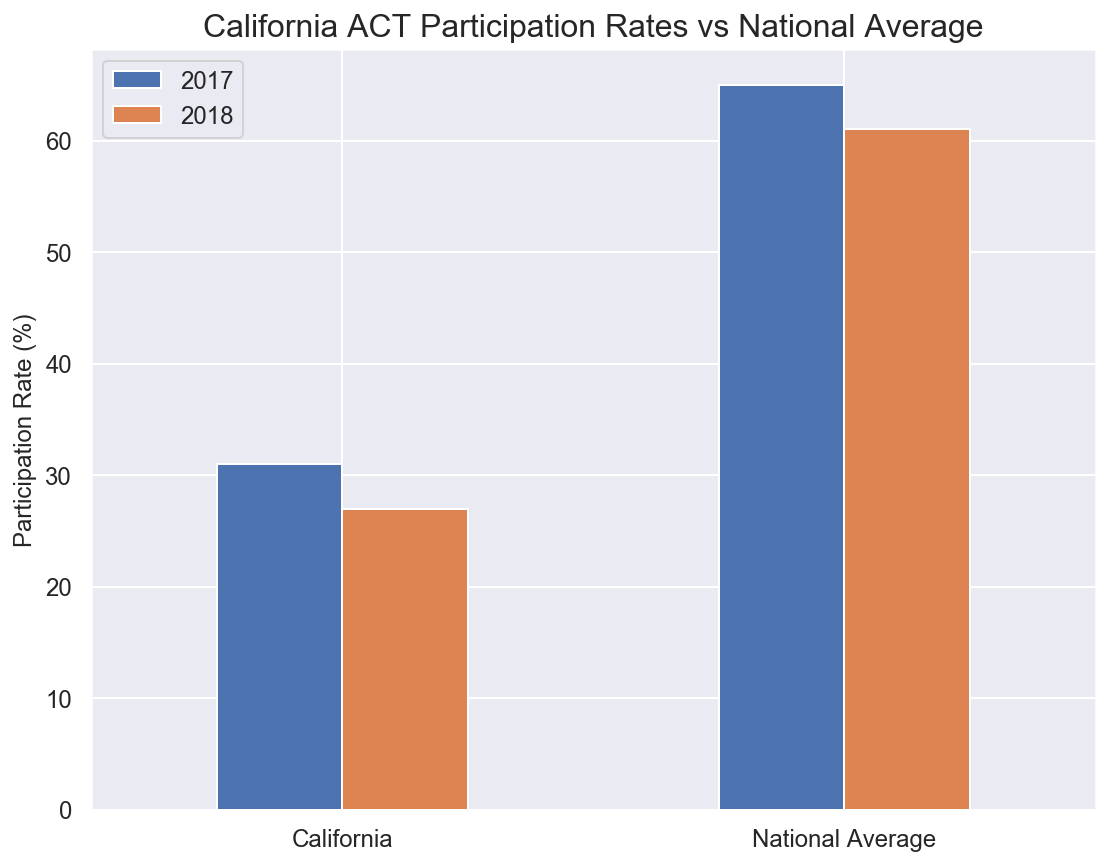

In [1443]:
california_act.plot.bar(rot=0, figsize=(9,7), fontsize=12);
plt.title('California ACT Participation Rates vs National Average', fontsize=16,);
plt.ylabel('Participation Rate (%)', fontsize=12);
plt.legend(fontsize=12);

The ACT participation rates for California is significantly lower than the National Average for both 2017 and 2018. (i.e. 31% - Cali vs 65% - National in 2017 & 27% - Cali vs 61% - National in 2018)

In [1444]:
california_sat = merged_scores[merged_scores['state']=='California']
california_sat = california_sat.drop(['reading_and_writing_sat_17','math_sat_17', 'total_sat_17', 'participation_act_17', 'english_act_17','math_act_17', 'reading_act_17', 'science_act_17', 'composite_act_17', 'reading_and_writing_sat_18', 'math_sat_18','total_sat_18', 'participation_act_18', 'english_act_18', 'math_act_18','reading_act_18', 'science_act_18', 'composite_act_18'], axis=1)
california_sat.reset_index(drop=True, inplace=True)
california_sat

,state,participation_sat_17,participation_sat_18
0,California,53.0,60


In [1445]:
national_sat_17 = int(merged_scores['participation_sat_17'].mean())
national_sat_18 = int(merged_scores['participation_sat_18'].mean())
print(national_sat_17)
print(national_sat_18)

39
45


In [1446]:
national_sat = pd.DataFrame({'state': ['National Average'],
                    'participation_sat_17': [national_sat_17],
                    'participation_sat_18': [national_sat_18]},
                    index=[1])
california_sat = pd.concat([california_sat, national_sat], axis=0)
california_sat = california_sat.rename({'state': '', 'participation_sat_17': '2017', 'participation_sat_18' : '2018'}, axis=1)
california_sat.set_index('', inplace=True)
california_sat

,2017,2018
,,
California,53.0,60
National Average,39.0,45


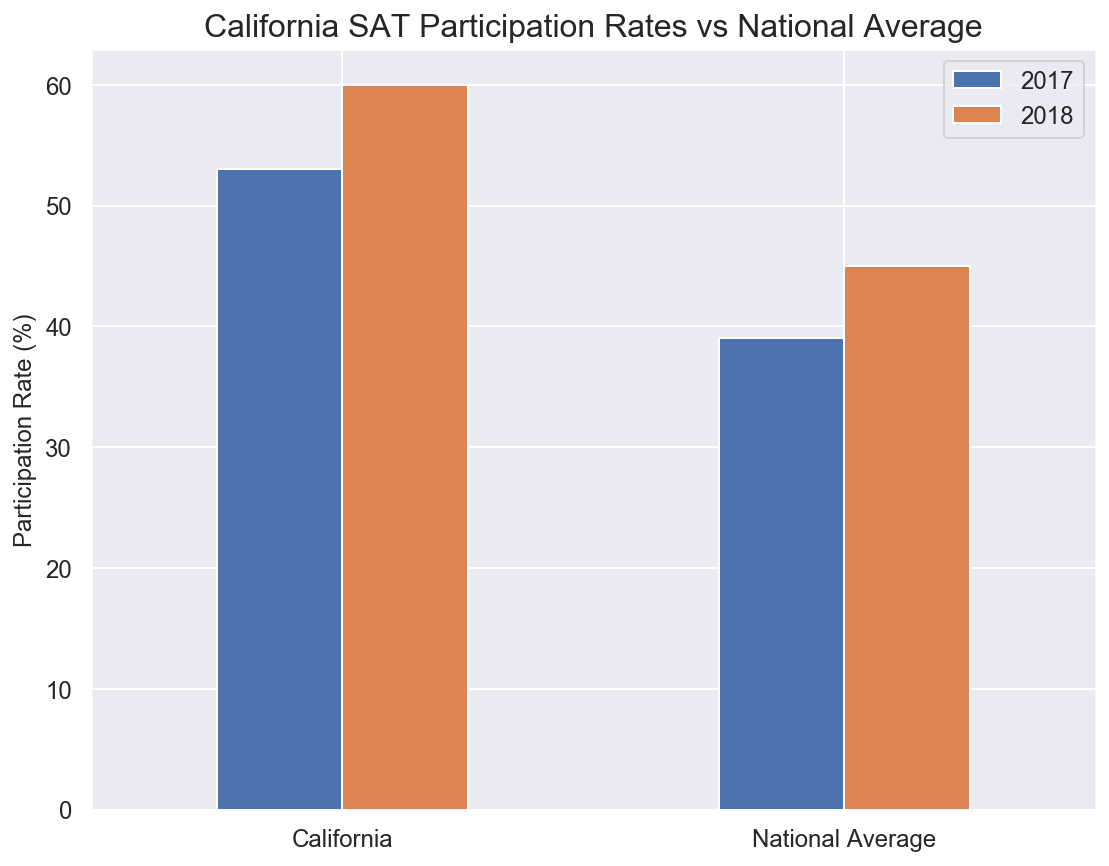

In [1447]:
california_sat.plot.bar(rot=0, figsize=(9,7), fontsize=12);
plt.title('California SAT Participation Rates vs National Average', fontsize=16,);
plt.ylabel('Participation Rate (%)', fontsize=12);
plt.legend(fontsize=12);

On the other hand, the SAT participation rates for California  shows an inverse trend.
It is substantially higher than the National Average for both 2017 and 2018. (i.e. 53% - Cali vs 39% - National in 2017 & 60% - Cali vs 45% - National in 2018)

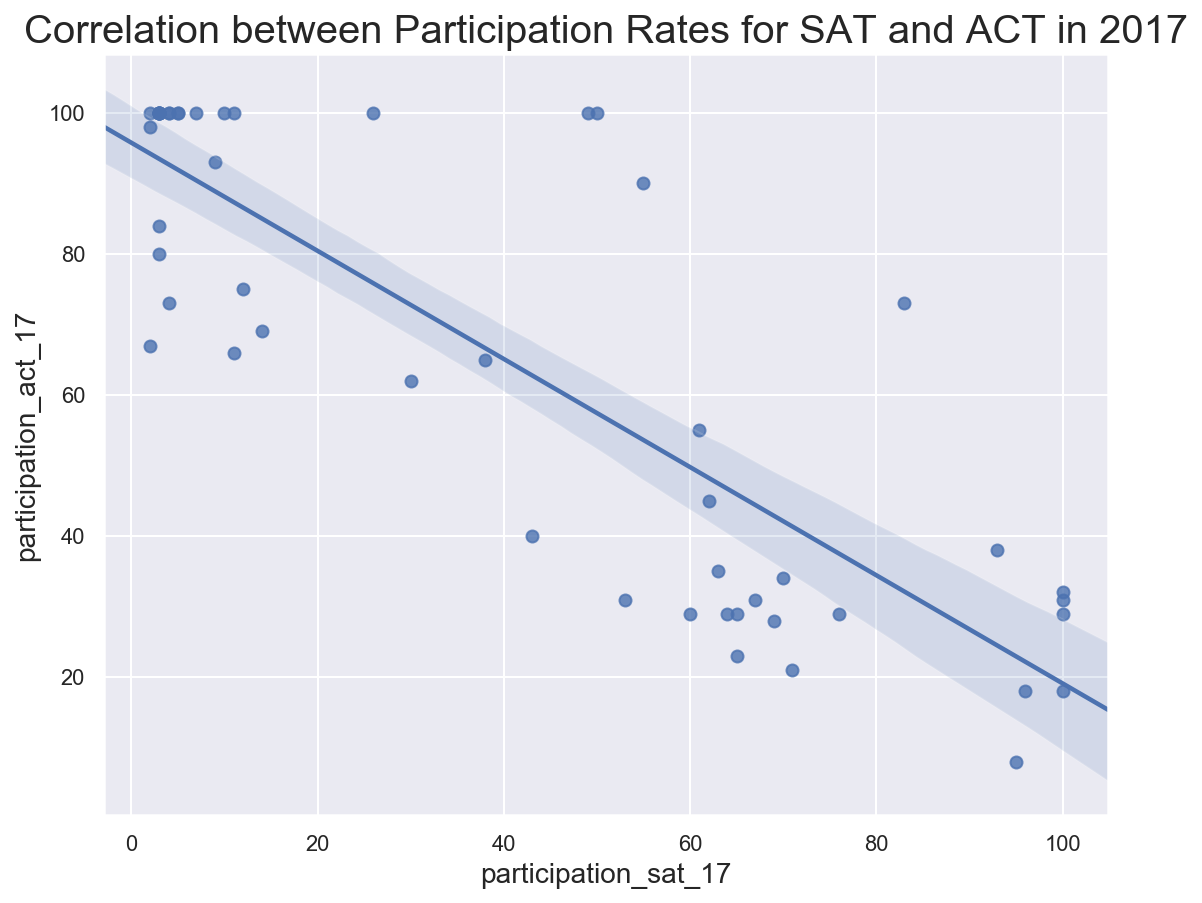

In [1448]:
#Scatterplot between Participation Rates for SAT and ACT in 2017
plt.rcParams["axes.labelsize"] = 14
participation_17 = sns.regplot(merged_scores['participation_sat_17'],merged_scores['participation_act_17']);
participation_17.set_title('Correlation between Participation Rates for SAT and ACT in 2017', fontsize=20);
fig = plt.gcf()
fig.set_size_inches(9, 7)

Based on the scatterplot and the downwards-trending regression line, there appears to be a strong negative linear correlation between SAT and ACT Participation Rates in 2017.

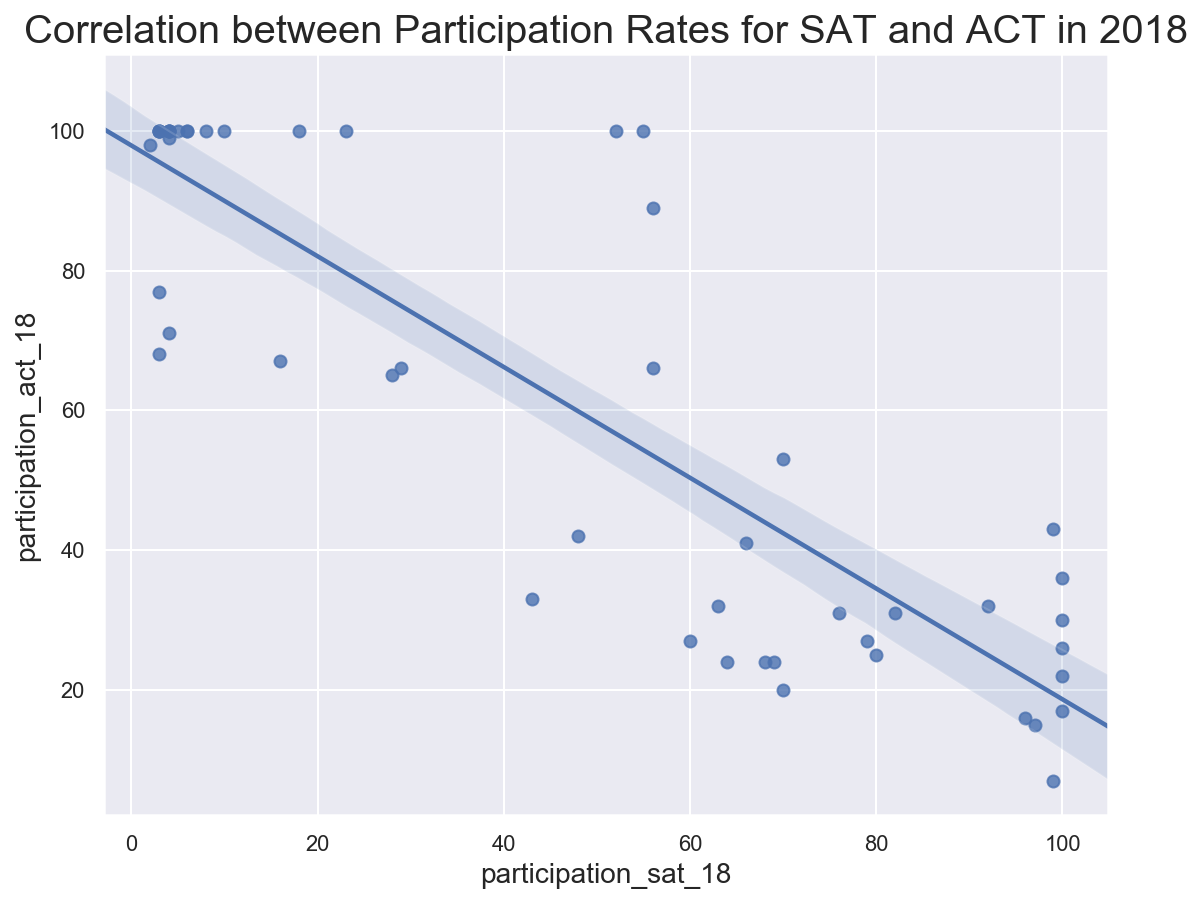

In [1449]:
#Scatterplot between Participation Rates for SAT and ACT in 2018
plt.rcParams["axes.labelsize"] = 14
participation_18 = sns.regplot(merged_scores['participation_sat_18'],merged_scores['participation_act_18']);
participation_18.set_title('Correlation between Participation Rates for SAT and ACT in 2018', fontsize=20);
fig = plt.gcf()
fig.set_size_inches(9, 7)

Based on the scatterplot and the downwards-trending regression line, there appears to be a strong negative linear correlation between SAT and ACT Participation Rates in 2018.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The ACT participation rates for California is significantly lower than the National Average for both 2017 and 2018. (i.e. 31% - Cali vs 65% - National in 2017 & 27% - Cali vs 61% - National in 2018)

**Corrobrate our Findings/ Recommended Solutions**

1. Mandatory testing/ Free Funding Option for Graduating Seniors

Unlike other states such as Alabama, Kentucky and Louisiana, California neither requires its high school seniors to take a mandatory ACT test  nor provides a free funding option should its students choose to do so.  

Reference: https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice 


2. Statewide Contracts with the College Board

“SAT usage also spiked in Colorado because of a contract with the College Board. There, 58,790 in the Class of 2018 took the test, 10 times the total of the previous year. The SAT also recorded larged gains in California... , the College Board said, although those states do not have similar statewide contracts.”

Reference: https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/ 


3. Provide fee waivers for low-income students and free test-prep materials

"The ACT and College Board say they have taken steps to make tests more accessible. Both provide fee waivers for low-income students and free test-prep materials."

Reference: https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/ 

**Future Project Explorations**

1. Correlation between test performance/ participation rates and factors such as family income, parent education levels and race

“Critics of the standardized tests say test performance is closely correlated with — and therefore likely influenced by — family incomes, parent education levels and race. They argue that using the tests for college admissions discriminates against disadvantaged students, including students of color, poor students and students with disabilities.”

Reference: https://www.sandiegouniontribune.com/news/education/story/2019-10-31/act-scores